In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm 

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
data.shape

(1306122, 3)

Class imbalance

In [5]:
sincere = data[data['target'] == 1]
insincere = data[data['target'] != 1]

In [6]:
sincere.head()

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1


In [7]:
insincere.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


([<matplotlib.patches.Wedge at 0x1181a3be0>,
 [Text(-0.21246424233489086, 1.079286313138947, 'Sincere'),
  Text(0.21246430549118883, -1.0792863007062339, 'Insincere')],
 [Text(-0.11588958672812227, 0.5887016253485164, '6.2%'),
  Text(0.11588962117701207, -0.5887016185670365, '93.8%')])

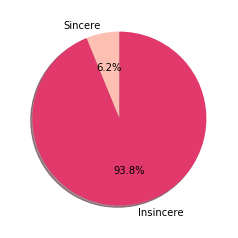

In [8]:
labels = ["Sincere","Insincere"]
values = [sincere.shape[0], insincere.shape[0]]
colors = ['#FEBFB3', '#E1396C']

fig1, ax1 = plt.subplots()
ax1.pie(values, colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

We will tackle this problem later

In [9]:
X_Train = data['question_text']
Y_Train = data['target']

In [11]:
#Check for missing data
print(X_Train.isnull().any())
print(Y_Train.isnull().any())

False
False


In [12]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]+\s+', ' ', text)
    text = text.lower()
    return text

In [13]:
clean_text("Today$$$ I will die. Tomorrow I will live")

'today i will die tomorrow i will live'

In [14]:
import spacy
nlp = spacy.load('en')

In [15]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
    "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", 
    "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you",
    "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
    "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not",
    "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
    "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
    "mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
    "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
    "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
    "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
    "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", 
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", 
    "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", 
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
    "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
    "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
    "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#Here we use a dictionary of common contractions in order to compile a regex pattern which will be used to replace contractions by their appropriate text
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

For now, I will only use nltk's stopwords, which I have modified, but I can possibly change this by using tf-idf

In [16]:
import nltk
import string
nltk.download("stopwords")
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
print(stopwords)
#let's manually remove some important ones
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
             "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he',
             'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
             'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
             'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
             'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
             'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
             'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into',
             'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
             'in', 'out', 'on', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
             'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
             'most', 'other', 'some', 'such', 'own', 'same', 'so', 'than',
             'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've",
             'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
punctuations = string.punctuation

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zedian_xiao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def get_tokens(text):
    tokens = nlp(text)
    tokens = [tok.lemma_.lower().strip() for tok in tokens if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    return tokens

In [18]:
get_tokens("Danny is studying in University")

['danny', 'study', 'university']

In [19]:
def preprocessing_text(text):
    text = clean_text(text)
    text = replace_contractions(text)
    text = get_tokens(text)
    text = " ".join(text)
    return text

In [20]:
xtrain = X_Train.copy()
for i,line in enumerate(xtrain):
    xtrain[i] = preprocessing_text(line)
    if i%100 == 99:
        print(i)
        print(X_Train[i])
        print(xtrain[i])

99
How many Indians are in Melbourne, Australia?
many indian melbourne australia
199
Are there instances of Medieval Latin text being later "translated" into Classical Latin (for the purpose of comparison)?
instance medieval latin text later translate classical latin purpose comparison
299
Which software do I prefer good for GST billings?
software prefer good gst billing
399
What is it like to work as an employee for Oprah?
like work employee oprah
499
Do we feel our breath?
feel breath
599
I have corrected only my exam centre in NEET form do I have to pay any correction fee?
correct only exam centre neet form pay correction fee
699
Is it wrong that I love someone I've never met?
wrong love someone never meet
799
Is queen Elizabeth related to king henry viii?
queen elizabeth relate king henry viii
899
What is the best motivation you've ever received?
good motivation ever receive
999
Who will win in video game battle: Adam d angelo vs Kim kardasian?
win video game battle adam angelo vs 

7099
How can tangerine zest improve a recipe's taste?
tangerine z improve recipe 's taste
7199
What are the fees of ACCA in Pakistan?
fee acca pakistan
7299
Is it legal for companies to buy available domains and sell them online for thousands of dollars?
legal company buy available domain sell online thousand dollar
7399
Is French overrated? Do you think it is unfair that such a big culture be promoted so expensively? Are Italian, Brazilian, and Ukranian prettier languages?
french overrate think unfair big culture promote expensively italian brazilian ukranian pretty language
7499
When a balloon is moving vertically upwards a body is dropped from it then?
balloon move vertically upwards body drop
7599
Classical physics.What is the difference between impact (Nt) and impulsive force(N)?
classical physics.what difference impact nt impulsive force(n
7699
Which is the best institute for Workday Real Time Online Training with Workday Tenant Access?
good institute workday real time online tra

13899
Could Vegito stand a chance against Whis? Why or why not?
could vegito stand chance against whis not
13999
If I have 4 lakhs how can I get maximum benifit with fixed deposit?
lakh get maximum benifit fix deposit
14099
What is your purpose when you decide to get married?
purpose decide get marry
14199
Would Harry Potter done well in Runes and/or Arithmancy if he did them instead of Divination? Why?
would harry potter well rune and/or arithmancy instead divination
14299
If our country is being endangered by Mexicans and Islamics why are the mass murders white American males?
country endanger mexican islamic mass murder white american male
14399
To what extent is it possible to program a human?
extent possible program human
14499
Ifan objects vibrates 30 times in 2 min then what it is frequency?
ifan object vibrate time min frequency
14599
Someone in my self help group spread a rumor that I have borderline personality disorder. I don't. How do I fight the rumor without looking like 

19899
What is the liberal position on transgenders in locker rooms?
liberal position transgender locker room
19999
Who would win a fight between a bear and an alligator?
would win fight bear alligator
20099
How should I use elliptical effectively to lose weight?
use elliptical effectively lose weight
20199
Does Vodafone 4G exist in Siliguri? If yes how it's performance
vodafone 4 g exist siliguri yes performance
20299
At what point did you realize you found true inner peace? How do you feel on a daily basis now that you have achieved it?
point realize find true inner peace feel daily basis achieve
20399
Does the Prime Minister think Trump is smart enough to understand your laws just because you say you are satisfied with them?
prime minister think trump smart enough understand law say satisfied
20499
Have you had success eliminating toenail fungus by drinking Apple cider vinegar?
success eliminate toenail fungus drink apple cider vinegar
20599
What are the best books on learning how to

26499
Are you doing your homework every day or does Quora do that for you?
homework every day quora
26599
How do you remove images from the picta on Google images?
remove image picta google image
26699
Is any girl is ready to sex this time in Karachi?
girl ready sex time karachi
26799
What are the most necessary rules to keep in mind while extending a thesis paper of someone else under the same supervisor?
necessary rule keep mind extend thesis paper someone else supervisor
26899
Which is the best cold coffee in Starbucks?
good cold coffee starbuck
26999
Can you run out of sperm?
run sperm
27099
What is the best way to find cheap one-way airline tickets?
good way find cheap one way airline ticket
27199
I have a very genuine and realistic business idea, how do I start what I have in mind?
genuine realistic business idea start mind
27299
What do the numbers mean on the Whittard coffee packs？?
number mean whittard coffee pack ？
27399
Why do bad structured data warehouse projects fail?
bad

33199
If I have a unique product in my mind and I want to promote it on a large scale after production, how should I start doing it?
unique product mind want promote large scale production start
33299
What has biology contributed to science?
biology contribute science
33399
Is there any stage in your two year preparation where you feel like quitting?
stage two year preparation feel like quit
33499
What is graduate engineer trainee salary and role in reliance industry?
graduate engineer trainee salary role reliance industry
33599
Who (state wise) would be hit the worst if a 2nd civil war happened?
state wise would hit bad 2nd civil war happen
33699
How can you describe the difference between associate's and bachelor's?
describe difference associate 's bachelor 's
33799
What is Charles R. Schwab best known for?
charle r schwab best know
33899
What was the harm of smooching a prostitute, whose STD status is unknown? Is that kissing over lips too dangerous?
harm smooch prostitute whose std

39599
Why does my knees hurt after I resumed playing football (soccer)?
knee hurt resume play football soccer
39699
What life event would exemplify this sentence, "We gauge our impotence by the omnipresence, magnitude, and perpetuity of suffering"?
life event would exemplify sentence gauge impotence omnipresence magnitude perpetuity suffering
39799
Is Russia inside Asia?
russia inside asia
39899
If all of earth's oil is extracted what would be the pourcentage of CO2 in the atmosphere compared to current levels?
earth 's oil extract would pourcentage co atmosphere compare current level
39999
In California, is it legal to sell Bitcoin to a friend?
california legal sell bitcoin friend
40099
How can the Hi-Chew cotton candies manufacturing process be improved?
hi chew cotton candy manufacturing process improve
40199
Are there still any leftists in Afghanistan?
still leftist afghanistan
40299
What do I do if Instagram deletes my account due to my age and won’t allow me to make another under

46999
Does tinnitus cause hearing loss?
tinnitus hear loss
47099
In Matlab, image processing, after I get the homography matrix, how can I create a function that warp the second image and combined them together?
matlab image processing get homography matrix create function warp second image combine together
47199
Can I get important questions for analytical methods of instrumentation?
get important question analytical method instrumentation
47299
The Fed discloses the discount window borrower banks' names after a 2 year lag for financial stability reasons. Do borrower banks, for those that are publicly traded, have to disclose the same information under securities disclosure laws?
fed disclose discount window borrower bank name year lag financial stability reason borrower bank publicly trade disclose information security disclosure law
47399
What are the trending softwares a computer science engineering student should learn?
trend software computer science engineering student learn
474

53299
Does the top writers on Quora get paid? Like YouTube when they have so many views?
top writer quora get pay like youtube many view
53399
What are the different types of bioenergy?
different type bioenergy
53499
What are the best ways that one could manipulate people?
good way one could manipulate people
53599
Why doesn't my mother believe me when I say sugar helps with the heat of spicy food?
not mother believe say sugar help heat spicy food
53699
What is the railway fare for AC 2 tier for 300km?
railway fare ac tier 300 km
53799
What does a low incom e student miss out on in college?
low incom e student miss college
53899
Are you still available to teach Yoruba?
still available teach yoruba
53999
What are some basic iPhone photography tips?
basic iphone photography tip
54099
What is the customs duty for importing a Graphics Card from US to India after GST?
customs duty import graphic card india gst
54199
What are fees for preschool in clermont ferrand France for 2 years old?
fee

60299
Why is it that you want to show affection towards anyone but can't because it's a little awkward for you?
want show affection towards anyone not little awkward
60399
I thought when Trump campaigned he promised to build a wall with lots of little doors. Am I suffering dementia?
think trump campaign promise build wall lot little door suffer dementia
60499
But KMS activate KMS connectio blocker and stop my Internet connection. What shoud I do?
km activate kms connectio blocker stop internet connection shoud
60599
Do Malay women like Africans & Tamils, as they are men a lot darker than themselves?
malay woman like african tamil man lot dark
60699
Do women have to be part of the Selective Service as well? If so, why?
woman part selective service well
60799
How do you pair a wine with a meal?
pair wine meal
60899
Why do my feet start burning all of a sudden?
foot start burn sudden
60999
What are the drawbacks of Rutherford's atomic model?
drawback rutherford 's atomic model
61099
Can I

66999
What date did Japan invade China?
date japan invade china
67099
If I tell my children that secretly picking cigarettes in the gas station is allowed due to the inherent evil that cigarettes have, does that mean that I can use this to my advantage?
tell child secretly pick cigarette gas station allow due inherent evil cigarette mean use advantage
67199
Can an employer take money out of your paycheck for another eempoyees misplacing a bank deposit? No police report filed. He claims that he has video evidence of the employee who did it but is penalizing all other employees.
employer take money paycheck another eempoyee misplace bank deposit no police report file claim video evidence employee penalize employee
67299
Definite vs indefinite integrals?
definite vs indefinite integral
67399
What should be the punishment for rape victims?
punishment rape victim
67499
Who would win in a battle between two wolves and 1 gorilla?
would win battle two wolf gorilla
67599
How was Verizon prepaid

73399
Does University of Waterloo and University of Toronto accept SAT scores?
university waterloo university toronto accept sit score
73499
How many pieces of music did Beethoven propose?
many piece music beethoven propose
73599
Is it worth wasting times in watching movies?
worth waste time watch movie
73699
What is prehypertension blood pressure?
prehypertension blood pressure
73799
Which is the best book available in the market for accounting?
good book available market account
73899
How did the inlet of the SR-71 produce thrust, given that it slowed the incoming air stream to subsonic velocity?
inlet sr produce thrust give slow incoming air stream subsonic velocity
73999
Is there a such thing as a dual turbocharger?
thing dual turbocharger
74099
Do fat cells ever go away?
fat cell ever go away
74199
What are some non-slipping & comfortable walking shoes for elder ladies who are already suffering from joint pain?
non slip comfortable walking shoe eld lady already suffer joint pain
7

80199
Can a meninist claim his sexual harassment of female employees is political activity?
meninist claim sexual harassment female employee political activity
80299
Should I select the option - Two or more certificates (one with three years) in CRS Tool? If ECA (from WES Canada) states Bachelor's degree (three years) and bachelor's degree (four years)?
select option two more certificate one three year cr tool eca wes canada state bachelor 's degree three year bachelor 's degree four year
80399
Where is a solid website where I can learn about gears enough to where I can 3D model them and know they are accurate?
solid website learn gear enough 3d model know accurate
80499
Where is the movie set?
movie set
80599
What is $\displaystyle\lim_ {x\to\frac {\pi} {2}} \dfrac {tan2x} {x-\frac {\pi} {2} $?
\displaystyle\lim x\to\frac \pi \dfrac tan2x x-\frac \pi
80699
Who's more likely to not wear make up? Psychopathic females or narcissist females?
more likely not wear make psychopathic female n

87199
How can I write an essay on water cycle?
write essay water cycle
87299
What brand is this biker jacket?
brand biker jacket
87399
How accurate is uTest?
accurate utest
87499
What do you think about the population of India surpassing that of China in the near future?
think population india surpass china near future
87599
How do I acquire SME customer leads?
acquire sme customer lead
87699
Can I apply to another college freshmen year if I already did senior year in high school?
apply another college freshman year already senior year high school
87799
What causes the baby to die in the womb?
cause baby die womb
87899
What would happen if something way faster than light (spaceship) passes through the centre of the blackhole?
would happen something way faster light spaceship pass centre blackhole
87999
Is staffing a problem with the Trump administration?
staff problem trump administration
88099
What was your most interesting case as a private detective?
interesting case private detecti

94299
What if I upload videos of comedy scenes of Bollywood movies, then will it get ads on it?
upload video comedy scene bollywood movie get ad
94399
How many years is a life sentence in the united states of America?
many year life sentence united state america
94499
How does a peace process affect urban areas or people from places that are not directly involved in a war?
peace process affect urban area people place not directly involve war
94599
Why don't online programming startups succeed?
not online programming startup succeed
94699
What is the effect of exalted sun in ninth house with Venus?
effect exalt sun ninth house venus
94799
How can I solve for x this problem: x=-2e^x?
solve x problem x=-2e^x
94899
What quantitative thesis topic can you give me for HRM senior high school students like me?
quantitative thesis topic give hrm senior high school student like
94999
Who are the best Epabx manufacturer in India?
good epabx manufacturer india
95099
How are you sure that you are no

100899
What should I do if my ex is threatening and blackmailing me with court action?
ex threaten blackmail court action
100999
Is it good to start a cab business in Pune?
good start cab business pune
101099
How can I avoid paralysis by analysis and get the job done in time?
avoid paralysis analysis get job time
101199
So the defendant is a no show in court, the judge issues a bench warrant. Turns out there is no warrant with the police dept. Was this a error on the court system that they did not send it over?
defendant no show court judge issue bench warrant turn no warrant police dept error court system not send
101299
How is the Brazilian relationship like?
brazilian relationship like
101399
Can I harness lightning energy?
harness lightning energy
101499
What would be the store manager role of petroleum company in India?
would store manager role petroleum company india
101599
Some damnned kids keep throwing stones on my roof. How can I get revenge on these little shits?
damnned kid

107699
How is Ramaiah institute of legal studies?
ramaiah institute legal study
107799
How can I find the refractive index of seawater?
find refractive index seawater
107899
How do I do investment in stock?
investment stock
107999
If atheism is just a lack of belief in gods, why do atheists have organizations? What is it they need to discuss or spread since atheism has no philosophy or a way of life?
atheism lack belief god atheist organization need discuss spread since atheism no philosophy way life
108099
Is it possible to buy shares of bronze online or do I need a broker?
possible buy share bronze online need broker
108199
Do I have a chance of marrying a BTS member?
chance marry bts member
108299
Did General Eisenhower ever visit the Palatinate in Germany after the war, from whence his Pennsylvania Dutch ancestors came to America?
general eisenhower ever visit palatinate germany war whence pennsylvania dutch ancestor come america
108399
Does the NeoDriven actually work like a level

114699
How can I make a platelet diagram?
make platelet diagram
114799
How can I take membership of central library in Raipur? What are the charges here?
take membership central library raipur charge
114899
What free lance/part time jobs can I take along with a full time job?
free lance part time job take along full time job
114999
What is the best type of sword to equip large amounts of barely trained people with?
good type sword equip large amount barely train people
115099
How do I sync my pictures folder with iCloud Drive?
sync picture folder icloud drive
115199
Is Milos Teodosic the best basketball playmaker in the world?
milo teodosic good basketball playmaker world
115299
What if the Soviet Union instead of collapsing, reformed to a capitalist styled federation?
soviet union instead collapse reform capitalist style federation
115399
Can I get CSE in Thapar University as my JEE Mains rank is 29728 and first round cut off for CSE is 24k?
get cse thapar university jee main rank fir

120899
Is it worth opting for hostel at Christ University BGR campus or opting for a PG is preferable?
worth opt hostel christ university bgr campus opt pg preferable
120999
How many people can mutual dream together?
many people mutual dream together
121099
What would be the most popular term for "Items Swap"?
would popular term item swap
121199
How am l going to design a system that controls the lighting system in poultry production?
l go design system control lighting system poultry production
121299
If a chimp raped a human and impregnated her, would pro-lifers rally for the unborn?
chimp rap human impregnate would pro lifer rally unborn
121399
How many fully flexible, high output solar cells exist?
many fully flexible high output solar cell exist
121499
What is measure?
measure
121599
What happens when Colareacts with the salt?
happen colareact salt
121699
Is my friend demeaning me if a group of popular boys says hi to me, then she says "they totally only said that because you're t

127299
Why aren't monetary and economic issues solved through logic at basic transaction level with respect to systemic input rather then through regulation?
not monetary economic issue solve logic basic transaction level respect systemic input rather regulation
127399
What is the Tamil meaning of "garbage menace leads to infectious disease"?
tamil meaning garbage menace lead infectious disease
127499
What is the main function of a security architecture?
main function security architecture
127599
Can new facts be added to evidence affidavit already filed in case they were not mentioned earlier or were found later?
new fact add evidence affidavit already file case not mention earlier find later
127699
What is the best advice for a young Indian, first-time startup CEO?
good advice young indian first time startup ceo
127799
How do people make friends easily (see comments for detail)?
people make friend easily see comment detail
127899
What is abnormal molar mass?
abnormal molar mass
12799

134199
Does it pay to be subtle when posing as a potential client of a private military company?
pay subtle pose potential client private military company
134299
What are natural ways to help cure autoimmune diseases?
natural way help cure autoimmune disease
134399
Is it possible to legally stream TV stations from LA online while living in NYC as a alternative way to a DVR?
possible legally stream tv station la online live nyc alternative way dvr
134499
Do you Know Hasanuddin University?
know hasanuddin university
134599
What is a good rehab centre in NYC? I’m addicted to eating Tide Pods and need help.
good rehab centre nyc addicted eat tide pod need help
134699
Who is the most popular/well known American actor/actress/singer in China?
popular well know american actor actress singer china
134799
What are a cyclone's structural characteristics?
cyclone 's structural characteristic
134899
Will some Trump supporters ever get tired of using the "what about Hillary" defense against all cri

140699
What is x,y, z values where xyz=4800 such that x+y+z is minimum?
x z value xyz x+y+z minimum
140799
What is the minimal viable institution?
minimal viable institution
140899
Is there one trait that will clearly tell me that I'm dating a sociopath?
one trait clearly tell date sociopath
140999
Who are the best people to follow on meow.social?
good people follow meow.social
141099
How can companies like Uber/Gett/Lyft increase driver's amounts during weekends? And why there's less driver's on weekends?
company like uber gett lyft increase driver 's amount weekend less driver weekend
141199
Why is ceramic used to make mugs, vases and cups?
ceramic use make mug vas cup
141299
What is the reason behind Pakistan's Hockey team downfall for many years? What can be done to make them great again?
reason behind pakistan 's hockey team downfall many year make great
141399
I really want a girlfriend. What should I do?
really want girlfriend
141499
What are some side effects of being an introv

147099
In Genesis, how would the effects of the fall have been different if only Eve ate the fruit?
genesis would effect fall different only eve eat fruit
147199
How can I maintain a friendship with a friend who used to be close who has since pushed me away?
maintain friendship friend use close since push away
147299
How effective is vinegar for treating a dog's ear infection?
effective vinegar treat dog 's ear infection
147399
How are germs artificially made?
germ artificially make
147499
I have dysthymia (mild depression) I can force myself to do things but the joy is missing from my life and I don't feel passionate about anything. It's just easier to sit and watch TV. How can I enjoy my life more and improve my life?
dysthymia mild depression force thing joy miss life not feel passionate anything easy sit watch tv enjoy life more improve life
147599
If leftists are correct & Trump isn't as rich as he claims, then how does he pull this off?
leftist correct trump not rich claim pull o

153299
Which is the best laptop repairing institute in Delhi?
good laptop repair institute delhi
153399
Why was Satyabhama, the second wife of Lord Krishna, so vain?
satyabhama second wife lord krishna vain
153499
What were Chanakya's views on democracy?
chanakya 's view democracy
153599
What are the pros and cons of journalism?
pro con journalism
153699
How does Walmart's purchase of stakes in Flipkart affect Amazon's ambitions in India?
walmart 's purchase stake flipkart affect amazon 's ambition india
153799
Where can I download movies in India?
download movie india
153899
What should be the height of a pilot?
height pilot
153999
How do I avoid becoming a racist?
avoid become racist
154099
Is Israel a Jewish ethnostate?
israel jewish ethnostate
154199
How do I invest in Ether?
invest ether
154299
How do you use PayPal in Pakistan legally?
use paypal pakistan legally
154399
Which is a better course masters in hotel management or MBA?
good course master hotel management mba
154499
Do 

160299
What is a gemologist?
gemologist
160399
What are some examples of administrative decisions?
example administrative decision
160499
Where can I get the market research report on the global military floating bridge market?
get market research report global military float bridge market
160599
Which chemical is used in this video? How is the chemical removed by Fire?
chemical use video chemical remove fire
160699
Does Pixar somehow earn money with their short movies?
pixar somehow earn money short movie
160799
What are effective and authentic factor to increase website rank?
effective authentic factor increase website rank
160899
Should Bugs Bunny wear pants?
bug bunny wear pant
160999
Do men need to celebrate their gender more and be more unified?
man need celebrate gender more more unified
161099
How do I recover my WhatsApp for a cancelled number?
recover whatsapp cancel number
161199
Why didn't the Germans try to establish a base in the Caribbean during World War II as a platfor

167199
If I pass a grade homeschooling & go public school, same grade, (want to make friends, etc.) can I skip a few weeks at times without getting into trouble w/ my school in 8th grade in Arizona? Is it a bad idea to do it again if I don't have to?
pass grade homeschool go public school grade want make friend etc skip week time without get trouble w school 8th grade arizona bad idea not
167299
Can a biracial person with one white parent, claim to be white, even if they look black?
biracial person one white parent claim white even look black
167399
What types of food can I eat to help with depression?
type food eat help depression
167499
What is the scope of a Browning Twelvette?
scope browning twelvette
167599
What are the effects of skipping a meal?
effect skip meal
167699
What are the musical relationships that result in a chord progression map?
musical relationship result chord progression map
167799
If Badarpur Thermal Power station is known to cause pollution in New Delhi, why i

173399
Who earns more, IPS or Army officer?
earn more ip army officer
173499
How did 'camp' become associated with being 'gay'?
camp become associate gay
173599
As a woman how do you deal with constant male attention, does it make you wish you were uglier?
woman deal constant male attention make wish ugly
173699
Will quota system be totally eliminated?
quota system totally eliminate
173799
What are some useful tips for someone who is starting work at Regis?
useful tip someone start work regis
173899
What are the cities in Mexico?
city mexico
173999
How long have scientific journals published on the internet for?
long scientific journal publish internet
174099
Why am I feeling like crying and scared for no reason?
feel like cry scar no reason
174199
When is it a good time to plant sunflowers?
good time plant sunflower
174299
What is the best CPU configuration under 75,000 Rupees?
good cpu configuration rupee
174399
How long would the Nazi regime have lasted if Britain and France had inv

179999
How is a Bank PO's job?
bank po 's job
180099
Will Ethereum achieve full network scalability before Bitcoin does?
ethereum achieve full network scalability bitcoin
180199
What is a good analysis of the book "Ark Angel" by Anthony Horowitz?
good analysis book ark angel anthony horowitz
180299
What is Agronomy, kindly share a good defination?
agronomy kindly share good defination
180399
Where can I sell my 1976 series two dollar bills in the Philippines?
sell series two dollar bill philippine
180499
Does Febreze actually "neutralize" odors?
febreze actually neutralize odor
180599
What is the differentiation of x^2 + 2√x?
differentiation x 2√x
180699
What is lasso and ridge regression?
lasso ridge regression
180799
What would you have regretted if you had never experienced it in your lifetime?
would regret never experience lifetime
180899
Have you ever walked out of a doctor's office because the doctor was being disrespectful to you?
ever walk doctor 's office doctor disrespectful


187299
What is the taxonomy of a giraffe?
taxonomy giraffe
187399
Can you reverse herpes?
reverse herpe
187499
How do I add background images in iMovies V.10.1.4?
add background image imovie v.10.1.4
187599
Will I get the oppurtunity to study maths in every IISER?
get oppurtunity study math every iiser
187699
What are the best practices for WeChat marketing?
good practice wechat marketing
187799
When will Indian-occupied Kashmir be free from Indian tyranny?
indian occupy kashmir free indian tyranny
187899
I'm 14 and my teacher 29, she afraid to have sex with me. How do I kill her fear and destroy barrier between us?
teacher afraid sex kill fear destroy barrier
187999
Is there a French version of the Kitchen Nightmares?
french version kitchen nightmare
188099
How do Istituto Marangoni and Polimoda compare against each other for Fashion Design (Undergrad)?
istituto marangoni polimoda compare against fashion design undergrad
188199
Can you explain how the British education system is struc

193899
How iBeacon Apps can help you in expanding your customer base?
ibeacon app help expand customer base
193999
How do you erase that voice in your head telling you that you will fail?
erase voice head tell fail
194099
How's SP Jain EMBA Program in Singapore?
sp jain emba program singapore
194199
Why would black NFL players kneel to a white president?
would black nfl player kneel white president
194299
Why did Han offer Rey a job?
han offer rey job
194399
What websites have the best moral and ethical Dilemmas?
website good moral ethical dilemma
194499
Is it normal to like a girl for ten years before you ask her out?
normal like girl ten year ask
194599
Is culture and race related?
culture race relate
194699
PLS understand me that why is the ring called a ring?
pls understand ring call ring
194799
Why does the Israeli army shoot Palestinian members of the press?
israeli army shoot palestinian member press
194899
How often do arms races lead to wars? And looking at current tension aro

201099
What does Mount Tambora look like?
mount tambora look like
201199
Do you know all about Jainism?
know jainism
201299
What is the comparison of deaths and disease from air pollution (from particulates) verses from the effects of CO2 gas?
comparison death disease air pollution particulate verses effect co gas
201399
As a white male, have you experienced "reverse discrimination" in the workplace? Do you think some accept this in order to create more diversity?
white male experience reverse discrimination workplace think accept order create more diversity
201499
How often do you replace an Ambiescent wax melt?
often replace ambiescent wax melt
201599
I have recently inherited a property which is worth a couple of million if I sell. What should be my best move?
recently inherit property worth couple million sell good move
201699
Finns Found to be genetically unique, genes vary significantly from Europeans - is this real?
finn find genetically unique gene vary significantly europeans 

208299
Has Quora become a propaganda tool for China with more professional content churned out in record time ?
quora become propaganda tool china more professional content churn record time
208399
Which is the best college for distance learning offering undergraduate degrees in Management?
good college distance learning offer undergraduate degree management
208499
How can you populate web forms using data from Google sheet?
populate web form use datum google sheet
208599
When can someone start their PhD?
someone start phd
208699
What is the governments three macroeconomic objectives?
government three macroeconomic objective
208799
How is the test for Ebola performed?
test ebola perform
208899
What does this boy want from me?
boy want
208999
Why was it Europeans who developed modern math and science, not other people famous for their accomplishments in the past like Arabs and Chinese?
europeans develop modern math science not people famous accomplishment past like arab chinese
209099
W

214999
How do I convince my dad that I'm not little anymore?
convince dad not little anymore
215099
What are some good resources to learn about blockchain to secure a job as a blockchain developer?
good resource learn blockchain secure job blockchain developer
215199
Has Islam's Quran or Hadees defined anywhere what actually a bad word is?
islam 's quran hadee define anywhere actually bad word
215299
What are some ways you can modify the Celestron 21036 PowerSeeker 70AZ telescope?
way modify celestron powerseeker 70az telescope
215399
Can a railgun potentially send small objects into space?
railgun potentially send small object space
215499
How could communities prevent the stress people experience because of modern day stressors, such as smartphones?
could community prevent stress people experience modern day stressor smartphone
215599
Which are the best free/paid sites and online tools to prepare for XAT 17?
best free pay site online tool prepare xat 17
215699
How was QGP formed in t

221299
Why do cats love their owner so much?
cat love owner much
221399
What does "tenezzül etmek" in the Turkish language mean?
tenezzül etmek turkish language mean
221499
What should I do if my 15-yrs-old daughter went to the police and told them lies about me?
15-yrs old daughter go police tell lie
221599
How do Mazanderani people consider themselves?
mazanderani people consider
221699
Why was theological purity more important for the pre-Contemporary rulers of Europe than its Buddhist counterparts?
theological purity more important pre contemporary ruler europe buddhist counterpart
221799
I have around 520 dollars that I have accumulated over my life. I am turning 14 years old in 3 days. What should I buy with my money?
around dollar accumulate life turn year old day buy money
221899
Why the Congress Government in India cares more for minorities than their Hindu population?
congress government india care more minority hindu population
221999
What is velscope?
velscope
222099
How mu

228199
Is it true that the fact management consulting firms give a lot of emphasis to the Alma mater, is only prevalent in India but not in other countries?
true fact management consulting firm give lot emphasis alma mater only prevalent india not country
228299
Which is better, Samsung S9 Plus or iPhone 8 Plus?
better samsung plus iphone plus
228399
What is the use of LinkedIn for an engineering student?
use linkedin engineering student
228499
What are globalisation impacts?
globalisation impact
228599
How does my penis grow again when I am effected with a side effect pill?
penis grow effect side effect pill
228699
Which program to choose - Data Science or Computer Science?
program choose datum science computer science
228799
What are the risks of getting an iPhone charger wet?
risk get iphone charger wet
228899
I don’t have friends. I always feel like everyone hates me and their interactions with me are just forced, because I don’t see the sincerity in them. How do I deal with this?


235299
How does Santa know if I have been good?
santa know good
235399
How has the Martello tower been conserved?
martello tower conserve
235499
How safe is the Indian practice of committing suicide by lying on a railway track?
safe indian practice commit suicide lie railway track
235599
Have you ever had a life-altering epiphany?
ever life alter epiphany
235699
How many times can you see a movie for the "first time" (without remembering any of it) by taking Rohypnol before seeing it?
many time see movie first time without remember take rohypnol see
235799
Are Muslim expats safe in China?
muslim expat safe china
235899
What do people mean when they say 'I don't see race'?
people mean say not see race
235999
What does Nick Groff have to do with Poppy?
nick groff poppy
236099
How do I defeat my own insecurities?
defeat insecurity
236199
Is their a name for a base and exponent pair?
name base exponent pair
236299
How do I get money into my IRA account when made out to my bank and FBO to m

241999
Is anyone doing a govt job after BDS?
anyone govt job bds
242099
How many hours in 1atp?
many hour 1atp
242199
How many terrorist attacks have been perpetrated by non-Muslims?
many terrorist attack perpetrate non muslim
242299
Do most criminals stop talking when they are arrested?
criminal stop talk arrest
242399
Is the size of all standard football pitch the same?
size standard football pitch
242499
Who are some Harvard Law students with unusual backgrounds?
harvard law student unusual background
242599
Is it compulsory to fill the map with pencil colours?
compulsory fill map pencil colour
242699
I will study MIT in The University of Melbourne in July, 2018, is there any girl who wants to share a room with me?
study mit university melbourne july girl want share room
242799
What if you found out your friend that was the same gender as you liked you?
find friend gender like
242899
How do I bring up my credit card account?
bring credit card account
242999
How do you shower a puffy

248899
Do atheists have nothing to be afraid of and always live happily?
atheist nothing afraid always live happily
248999
Is it possible to search pictures from World War 2 by battalion/company/etc.? I am trying to find pictures of my grandfather in action.
possible search picture world war battalion company etc try find picture grandfather action
249099
Is bigamy is crime in India?
bigamy crime india
249199
How do the four types of coal compare and contrast chemically?
four type coal compare contrast chemically
249299
How can someone with a technical background (organic chem, engineering, physics) best get up to speed on food chemistry? I'm interested in the industrial side (e.g., why exactly might my almond milk have calcium phosphate in it).
someone technical background organic chem engineering physic best get speed food chemistry interested industrial side e.g exactly may almond milk calcium phosphate
249399
How should I work in a private sector bank to achieve fast growth and suc

255999
Is the preamble's content true to its word?
preamble 's content true word
256099
How can a person forget his ex, who was a gem, and stop punishing and thinking low of himself for years since he knows he was the one to be blamed for the breakup and move on from this huge loss?
person forget ex gem stop punish think low year since know one blame breakup move huge loss
256199
Can I Study for CLAT while doing a diploma course in CSE?
study clat diploma course cse
256299
Why do I find jiggly (man) bellies attractive?
find jiggly man belly attractive
256399
Does a priori knowledge about the Big Five personality dimensions and their meanings alter test results?
priori knowledge big five personality dimension meaning alter test result
256499
What distinguishes Joshua Michael Peck's acting style?
distinguish joshua michael peck 's acting style
256599
How do I help my dad who is being retrenched?
help dad retrench
256699
Do coding requires high IQ?
coding require high iq
256799
How do you

262999
Why do I still think about him all the time and feel like I miss him so much if I ended the relationship? Why is the attachment still so strong even though I know we weren't the right fit?
still think time feel like miss much end relationship attachment still strong even though know not right fit
263099
What is the difference between Ion Torrent and Illumina Sequencing?
difference ion torrent illumina sequencing
263199
What do you feel when you feel burnt out more by stress than the work you have put in for an upcoming professional exam?
feel feel burn more stress work put upcoming professional exam
263299
Will Engineering students have holidays or not? If there then when?
engineering student holiday not
263399
Does bullying make life beautiful?
bully make life beautiful
263499
What inspired the design of the Cessna Skymaster?
inspire design cessna skymaster
263599
I was offered a job but the HR wouldn’t let me see my contract until I say yes. I only have their oral assurances a

269299
What is the white smoke released from jet aircrafts?
white smoke release jet aircraft
269399
What was the best way to deal with debt collectors?
good way deal debt collector
269499
Does Gordon Miller think buying a restaurant is a smart investment for starting out in business?
gordon miller think buy restaurant smart investment start business
269599
What does it mean to be matured on Facebook?
mean mature facebook
269699
What are the similarities between Shinto and Buddhism?
similarity shinto buddhism
269799
Is the difficulty level of CAT equivalent to the recent AIMCATS like 1813?
difficulty level cat equivalent recent aimcat like 1813
269899
What if the world was Easternized?
world easterniz
269999
What is gyroscopic precession?
gyroscopic precession
270099
What conclusion about physics?
conclusion physics
270199
What is a 50 caliber handgun used for?
caliber handgun use
270299
Is Rahul Gandhi a patita or casteless?
rahul gandhi patita casteless
270399
What is Muhammad’s relat

275899
What is the most profitable crop for farmers in UK?
profitable crop farmer uk
275999
Is blackstar ht5 amp loud enough for gigs?
blackstar ht amp loud enough gig
276099
In a fighter jet, how hard would it be to do a loop starting nose down? Not a pull back the stick loop, a push it forward complete loop.
fighter jet hard would loop start nose not pull back stick loop push forward complete loop
276199
Is it possible to crack NET for an average general candidate that too after new rule of 6% criteria?
possible crack net average general candidate new rule criterion
276299
Where I can get tutorials for ES6?
get tutorial es6
276399
We can store data of ren cars and data of ten motersycsl and data of ten sycles in one linklist at a time?
store datum ren car datum ten motersycsl datum ten sycle one linklist time
276499
How can I convert 10$ into 10000$ within 3 months?
convert within month
276599
Why in the modern Western PC-filled world prejudice against Russians is tolerated?
modern w

282599
Why does it only take a smile to make some people fall in love with someone of the other gender?
only take smile make people fall love someone gender
282699
How does Instagram/Snapchat stream story videos so fast?
instagram snapchat stream story video fast
282799
How come that health insurance companies such as Mawista offer insurance plans much less than the minimum coverage required for Schengen visa?
come health insurance company mawista offer insurance plan much less minimum coverage require schengen visa
282899
What are some best videos to know science and technology history?
good video know science technology history
282999
Are you satisfied with your current financial status?
satisfied current financial status
283099
How can a kick to the face break someone’s neck?
kick face break someone ’s neck
283199
What's the best sex experience ever?
good sex experience ever
283299
How do you make a rainbow bloom bracelet?
make rainbow bloom bracelet
283399
What is the most used LMS

289699
What do child laborers think of child labor?
child laborer think child labor
289799
How do I read the body language of people around me?
read body language people around
289899
Is it ok that no scab has formed after my laser mole removal yesterday?
ok no scab form laser mole removal yesterday
289999
What makes a neuron learn?
make neuron learn
290099
What happens if I took more than 5 pills that are some what similar to Xanax last night and I woke up this morning with my chest hurting really bad?
happen take more pill similar xanax last night wake morning chest hurt really bad
290199
How do I solve the clipper circuit with practical diode?
solve clipper circuit practical diode
290299
How do we defeat racism? One incident at a time, or blame another race?
defeat racism one incident time blame another race
290399
How and why is (a/b) /c different from a/(b/c)?
b /c different a/(b c
290499
Where can I buy a domain with bitcoins?
buy domain bitcoin
290599
What are some examples of '

296499
After Eve ate the fruit, did her body experience an immediate deterioration?
eve eat fruit body experience immediate deterioration
296599
Why convert star to delta transformation?
convert star delta transformation
296699
What is the best website where I can find every PS2 game and buy it?
good website find every ps game buy
296799
Why do you think flaunting your body parts is a sign of women empowerment and then you come up with statements like you don’t care?
think flaunt body part sign woman empowerment come statement like not care
296899
Why is Martin Shkreli going to jail? He did nothing wrong.
martin shkreli go jail nothing wrong
296999
Why do so many people in England suffer mental health issues? One in fours suffer mental health issues in England? Isn't it strange?
many people england suffer mental health issue one four suffer mental health issue england not strange
297099
Why is talking to girls so difficult for an introvert like me?
talk girl difficult introvert like
29

302799
Is there an Airavat Club Class bus from Mangalore to Ooty?
airavat club class bus mangalore ooty
302899
How do I say I'm sorry to a guy if I walked out on him during an emotional conversation?
say sorry guy walk emotional conversation
302999
Do sugar and sodium neutralize one another in a diet?
sugar sodium neutralize one another diet
303099
What are core role of the media in a democratic society?
core role medium democratic society
303199
Can Discharge certificate of defence pensioner produced as proof for DOB in Adhar card?
discharge certificate defence pensioner produce proof dob adhar card
303299
What are some pros of having parents in the military?
pro parent military
303399
Which industries does General Electric operate in and what do they do?
industry general electric operate
303499
What is the culture of internet?
culture internet
303599
How is the illustrative style of the Devils and Realist Japanese manga?
illustrative style devil realist japanese manga
303699
What's t

309799
How have audiences in Indonesia reacted to Marvel’s Black Panther?
audience indonesia react marvel ’s black panther
309899
What can I do if my friends don't respect my likes & dislikes?
friend not respect likes dislikes
309999
How can I get Wbpsc sub assistant engineer in civil previous year question papers?
get wbpsc sub assistant engineer civil previous year question paper
310099
Would you create a black hole by accelerating something fast enough since the force produced by acceleration is equivalent to the force of gravity?
would create black hole accelerate something fast enough since force produce acceleration equivalent force gravity
310199
Before the modern germ theory of disease, did some cultures still show a serious, conscious concern for sanitation to prevent disease?
modern germ theory disease culture still show serious conscious concern sanitation prevent disease
310299
Do you think it is correct to increase the salaries of MPs in Tamil Nadu while farmers commit sui

315899
How did Hitler kill Jews and said because he was a Christian?
hitler kill jew say christian
315999
What are some things you can do if you are angry? Let's say you just quarrelled with someone and you're still steaming and seething from anger even an hour later. What are some things that you can do by yourself to cool off?
thing angry let say quarrel someone still steam seethe anger even hour later thing cool off
316099
What are the best private universities in Kolkata?
good private university kolkata
316199
What are some rare pics of amazing animals?
rare pic amazing animal
316299
When did Muslims first refer to non-Muslims as infidels?
muslim first refer non muslim infidel
316399
How can I recover deleted not files on my iPod 6?
recover delete not file ipod 6
316499
Why are people as well as processes ignored even after knowing they are important for the existence of an organization?
people well process ignore even know important existence organization
316599
Is MBA a better op

322799
What is the Canadian equivalent of folk music?
canadian equivalent folk music
322899
What real life material would Batman's cape be made of?
real life material would batman 's cape make
322999
what is Kim Jong Un like in person?
kim jong un like person
323099
Where can I find the meaning of the Malayalam song 'Puzhu Pulikal' from the movie Kammatipaadam?
find meaning malayalam song puzhu pulikal movie kammatipaadam
323199
In which US states can I legally make porn?
state legally make porn
323299
What is the 12k Sales Activity Challenge? Is it even possible to put up 12,000 sales activities in a month by a single sales person?
12k sale activity challenge even possible put sale activity month single sale person
323399
Should a person fighting cancer for 16 years be depressed?
person fight cancer year depress
323499
If someone behaved like a real-life Mr Bean, would he be diagnosed with any mental condition / behavioural disorders?
someone behave like real life mr bean would diagno

329899
What is meant by "depth of member", and what's the formula of it?
mean depth member formula
329999
Why should I not aim to meet a daily quota for asking Quora questions?
not aim meet daily quota ask quora question
330099
What is the school fees stricture OS holy cross school, Silchar?
school fee stricture os holy cross school silchar
330199
What are the charge rates outputs (hours) of batteries of 5V with 2.4A, 2.1A and 1A ranges?
charge rate output hour battery 5v 2.4a 2.1a 1a range
330299
Is there any difference between "and" and "&"?
difference
330399
How do you feel if someone implemented your brilliant idea? What do you think of them?
feel someone implement brilliant idea think
330499
If there were no Android, weird Windows phone be competing with Apple?
no android weird window phone compete apple
330599
What are the sharpest Minolta leses I can buy for my Sony a58?
sharp minolta les buy sony a58
330699
A guy that I have just started seeing has ignored a simple friendly tex

336999
Can I use two 8ohm cabes in my orange amp dual terror?
use two 8ohm cabe orange amp dual terror
337099
What is a replacement window?
replacement window
337199
Is it true that both dormmau and galactus both fear a evil being?
true dormmau galactus fear evil
337299
How can I save $500 a month?
save month
337399
Do cats and dogs fight in the wild?
cat dog fight wild
337499
How does the life and salary of a software engineer compare with an investment banker?
life salary software engineer compare investment banker
337599
I've contemplated doing masturbation porn to help my parents get by since they're going through a rough patch. Does anyone know a place that would pay you to do homemade videos?
contemplate masturbation porn help parent get since go rough patch anyone know place would pay homemade video
337699
Can a company fire an employee who is pregnant?
company fire employee pregnant
337799
Why did Germany treat military prisoners of war from the Western Front well, but simultan

344099
What is role of BCCI?
role bcci
344199
How is life of drilling branch in ONGC?
life drill branch ongc
344299
I pursued BEng (Hons) in Aerospace Engineering. I graduated recently and hold no work experience. Can I still apply for the PM certification?
pursue beng hon aerospace engineering graduate recently hold no work experience still apply pm certification
344399
Is there a MOOC database design?
mooc database design
344499
Who would win in a fight between 1,000,000 flat earthers and 1,000 Princess Lunas?
would win fight flat earther princess luna
344599
What should I prepare for interviews?
prepare interview
344699
What are some iconic images of Bengaluru?
iconic image bengaluru
344799
Whose lectures are very good in clearing concepts of structural engineering for civil engineering?
whose lecture good clear concept structural engineering civil engineering
344899
What does the Russian word “zjloby“ mean and how is it used?
russian word zjloby mean use
344999
I live in NYC and li

351299
How is it fair that people are living struggle and you are living good?
fair people live struggle live good
351399
Why would someone stare at them self in the mirror while talking to you?
would someone stare self mirror talk
351499
After clearing UPSC is it mandatory to take the job (if I got IRS inspite of IAS bcoz of my rank)?
clear upsc mandatory take job get irs inspite ias bcoz rank
351599
What rank can I expect if I'm getting around 70 marks in VITEEE 2018?
rank expect get around mark viteee 2018
351699
Redditors tend to have an extremely negative opinion of India and Indians. As young Americans are the largest demographic on Reddit, does this indicate that young Americans in general have a negative opinion of India and Indians?
redditor tend extremely negative opinion india indian young american large demographic reddit indicate young american general negative opinion india indian
351799
How does theory of relativity help to prove the existence of black hole?
theory relat

357999
What are the fees we should watch out for when shipping to the USA?
fee watch ship usa
358099
Should I use his friend as a messenger to tell him he has bad breath?
use friend messenger tell bad breath
358199
Why did Pakistan close down the Kashmir National Bank?
pakistan close kashmir national bank
358299
Is Namibia's language policy failing?
namibia 's language policy fail
358399
Why is Bret Victor special?
bret victor special
358499
Is it likely that the generational decrease of testosterone in today's men is due to female baby boomers' choosing more sensitive men?
likely generational decrease testosterone today 's man due female baby boomer choose more sensitive man
358599
What things do I need to buy to start learning how to animate?
thing need buy start learn animate
358699
Is stress a factor in both systolic and diastolic blood pressure?
stress factor systolic diastolic blood pressure
358799
Which company provide the best quality submersible pumps?
company provide good qua

364799
How is a question denoted as having emphasis, in writing?
question denote emphasis writing
364899
What is the logic with unemployment benefits? Can't money be used to create jobs? What is stopping more and more people being on the dole?
logic unemployment benefit not money use create job stop more more people dole
364999
Has any political figure been assassinated with a throwing star, or any warrior of note who specialized in it?
political figure assassinate throw star warrior note specialize
365099
How do I get ideas for a new startup business?
get idea new startup business
365199
What made Hanya Holm's dancing technique so special?
make hanya holm 's dancing technique special
365299
How do I start a comic book?
start comic book
365399
If height of an equilateral triangle is 6cm Find its area?
height equilateral triangle 6 cm find area
365499
How do you feel when you know that your loved ones are gonna die one day?
feel know love one go die one day
365599
What is SAP GTS traini

370899
Is IC loader also known as bootloader?
ic loader also know bootloader
370999
What is the payback rule?
payback rule
371099
Plz give me blue whale game link?
plz give blue whale game link
371199
Should I do CFA and then pursue actuary (because we get all CT papers exemptions plus CT0?
cfa pursue actuary get ct paper exemption plus ct0
371299
Is it very difficult for the liberals in California to understand that being nice to people doesn't improve anything? Is the intellectual decay of Europe not enough for them to see that universal education is a bad idea?
difficult liberal california understand nice people not improve anything intellectual decay europe not enough see universal education bad idea
371399
How is the job market for Multi-Agent Systems and Robotics inclusive/exclusive of reinforcement learning in USA?
job market multi agent system robotic inclusive exclusive reinforcement learning usa
371499
What makes Modi a great potty?
make modi great potty
371599
Can my prefere

376799
What's the best advice for a first time start-up business that will revolve around an iPad app?
good advice first time start business revolve around ipad app
376899
How is osmolarity in blood measured?
osmolarity blood measure
376999
Where should you upload your own mixtapes?
upload mixtape
377099
Is it possible to wash bedsheets with clothes in the laundry?
possible wash bedsheet clothe laundry
377199
Is 100 kg LPG not enough to burn 5000 solid bricks in 10*10*8 ft room?
kg lpg not enough burn solid brick ft room
377299
How does a news website earns money or do their business?
news website earn money business
377399
What tissue makes red blood cells?
tissue make red blood cell
377499
What are the most formidable obstacles in developing a universal writing system that could be used and understood by everyone regardless of what their native language is?
formidable obstacle develop universal writing system could use understand everyone regardless native language
377599
What are th

383399
Do Corvettes have a tendency to go tail happy? Like the ZR-1 Pace car that wrecked at the Detroit Grand Prix?
corvette tendency go tail happy like zr pace car wreck detroit grand prix
383499
Why don't women have all female run mafia, drug cartels, arms dealers, terrorist groups, street gangs and other crime rings? Does it prove that they don't have as much power as males yet?
not woman female run mafia drug cartel arm dealer terrorist group street gang crime ring prove not much power male yet
383599
Why are humans the only species on this planet that drink milk from another lactating species and well past two yrs of age? Is this natural!
human only specie planet drink milk another lactating specie well past two yrs age natural
383699
Why is my dick hard as a rock?
dick hard rock
383799
What's the exact middle of America?
exact middle america
383899
WHY Didn't MANAPHY become A SEA PRINCE in POKEMON?
not manaphy become sea prince pokemon
383999
What content shouldn't be allowed on

389899
What inspired Lisa Robin Kelly to become an actress?
inspire lisa robin kelly become actress
389999
How is Theranos different from other lab-on-chip biotech companies?
theranos different lab chip biotech company
390099
Why was President Obama able to get Chelsey Manning back and not Otto Warmbier?
president obama able get chelsey man back not otto warmbi
390199
Shep Smith is one of the few people on Fox News who's not an enthusiastic supporter of Trump, to say the least. What's your guess as to why he hasn't been fired/forced out yet, since he's undoubtedly on top of Trump supporters' public-enemies list?
shep smith one people fox news not enthusiastic supporter trump say least guess not fire force yet since undoubtedly top trump supporter public enemy list
390299
What are the factors affect blood transfusion?
factor affect blood transfusion
390399
Which pen can be good and writing?
pen good write
390499
What is breaking and entering? How is this punished?
break enter punish
390

396999
Did medieval lords pay taxes?
medieval lord pay tax
397099
Why do I salivate excessively in the morning before I brush my teeth, even though I have no tooth infection or allergy? Although after brushing it disappears, how do I stop it?
salivate excessively morning brush tooth even though no tooth infection allergy although brush disappear stop
397199
What engineering challenges were faced during the construction of Roosevelt Island Tramway?
engineering challenge face construction roosevelt island tramway
397299
Which is the best place in Kodaikanal for honeymoon couples?
good place kodaikanal honeymoon couple
397399
Who would win, Batman and Green Arrow vs Count Vertigo?
would win batman green arrow vs count vertigo
397499
How do you obtain Charlotte Lewis' outfits as Kee Nang in "The Golden Child" with Eddie Murphy?
obtain charlotte lewi outfits kee nang golden child eddie murphy
397599
Why do people think The Walking Dead is a terrible show? A lot of people like my friends and

403199
What happens when you defy assumptions? How do you do it?
happen defy assumption
403299
Did musicians in ancient civilizations get paid to perform?
musician ancient civilization get pay perform
403399
Is it possible to make white wine from red grapes?
possible make white wine red grape
403499
What is the annual fees of MCA Cricket coaching?
annual fee mca cricket coaching
403599
How do people take out anger and stress with hip hop?
people take anger stress hip hop
403699
Why is that Quora is always flooded with questions about Telugu, Tamil and South India?
quora always flood question telugu tamil south india
403799
I need to write a thematic essay, which book should I write it on?
need write thematic essay book write
403899
Should NHS (UK) charge for self inflicted diseases caused by excessive drinking/smoking? Or should medical insurance be compulsory to cover the cost of these diseases/injuries?
nhs uk charge self inflict disease cause excessive drinking smoking medical insur

409799
Should I be put under anesthesia to have a tooth pulled?
put anesthesia tooth pull
409899
How do you teach children accountability?
teach child accountability
409999
Does anyone need a home fitness trainer in Gurgaon?
anyone need home fitness trainer gurgaon
410099
What are the types of tortoises? How do they differ from one another?
type tortoise differ one another
410199
What causes black spots on my legs?
cause black spot leg
410299
How do like charges attract each other in an atom?
like charge attract atom
410399
What all skills do Facebook, Google, Amazon and other big tech companies except from someone who's applying for Front-end internship?
skill facebook google amazon big tech company except someone apply front end internship
410499
Are 100 days of preparation enough to crack the CAT 17?
day preparation enough crack cat 17
410599
Do they think you're a wizard if you call Hogwarts?
think wizard call hogwart
410699
What is the g'(x) when g(x) =\int_ {5x+1} ^ {x^2} \frac {

416799
What should I do if I hated my collage?
hat collage
416899
Is it possible to get mechanical engineering branch in VIT Vellore campus if my rank is 61057?
possible get mechanical engineering branch vit vellore campus rank 61057
416999
Can I expect a call from IIM ABC if I have 7.4 CGPA in class 10?
expect call iim abc cgpa class 10
417099
Is it acceptable for my boss to send a farewell email to my colleagues for me? They fired me then informed my colleagues I was leaving
acceptable boss send farewell email colleague fire inform colleague leave
417199
Why are Persians obsessed with the DNA of the Turks?
persian obsess dna turk
417299
What is the best topics for beginning to write?
good topic begin write
417399
What should I do after 12 for nautical engineering?
nautical engineering
417499
How can I speak to a psychiatrist/psychologist for free because I do have lots of weird and bizzare feelings/thoughts?
speak psychiatrist psychologist free lot weird bizzare feeling thought
41759

423799
Is there an instant chat group specifically for Dribbble designers?
instant chat group specifically dribbble designer
423899
Do Mexicans descend from the Germanic tribes as well?
mexican descend germanic tribe well
423999
What are the best websites for writing, reading, and sharing short stories or novel length stories for tweens/teens (ie Wattpad)? Why?
good website write reading share short story novel length story tween teen ie wattpad
424099
I recently started taking a magnesium supplement everyday and I feel amazing. Can anyone explain why?
recently start take magnesium supplement everyday feel amazing anyone explain
424199
How can I login into Instagram on websites?
login instagram website
424299
What would the Marvel Cinematic Universe version of Captain America think if he saw a same-sex couple today? (Or basically anything that would have been unacceptable prior to him getting frozen in ice)
would marvel cinematic universe version captain america think see sex couple to

430399
How would you set up scuba gear in order to survive a tsunami?
would set scuba gear order survive tsunami
430499
What are rare but important experiences for technology industry leaders?
rare important experience technology industry leader
430599
Are you afraid of vaccines?
afraid vaccine
430699
How can I feel better when I feel guilty?
feel good feel guilty
430799
What are some of the best horror movies out there?
good horror movi
430899
What are some lame excuses or reasons or situations a guy has put you in , which made you feel he was not intrested in you anymore?
lame excuse reason situation guy put make feel not intrest anymore
430999
Who is the cricket captain of India?
cricket captain india
431099
How does a breast lump feel like?
breast lump feel like
431199
Why did you have a gambling phase? How?
gambling phase
431299
Why do schools in the arts (art, dance, acting) require the students to already have the talents and skills before they attend?
school art art dance actin

437899
With reactivated Codius, is Ripple going after Ethereum?
reactivated codius ripple go ethereum
437999
What happens to your mind in a comatose state? Can you feel or think?
happen mind comatose state feel think
438099
What would you do if a long time friend dated someone truly awful?
would long time friend date someone truly awful
438199
Do Patanjali hire chemical/process engineers?
patanjali hire chemical process engineer
438299
What was the one habit you started doing that improved your motivation?
one habit start improve motivation
438399
If a student is placed in a company in final year and after that he keeps an arrears in Exam (which he couldn't clear), would that job offer be neglected to that individual?
student place company final year keep arrear exam could not clear would job offer neglect individual
438499
How do I become a great ladies man?
become great lady man
438599
What are the things that our brain constantly lies to us about?
thing brain constantly lie
438699
H

444699
Why number of orbits across the period in periodic table remains the same?
number orbit across period periodic table remain
444799
Why does my skin feel so tight after I wash my face?
skin feel tight wash face
444899
How is the So Cal Cologne by Hollister mass produced?
cal cologne hollister mass produce
444999
How can I speak English fluently in?
speak english fluently
445099
What are some facts about UPSC exam that very few people know?
fact upsc exam people know
445199
Are IT engineers qualified to work in fields like robotics and artificial intelligence?
engineer qualified work field like robotic artificial intelligence
445299
Why does evolution occur?
evolution occur
445399
How do I defeat my opponent in a debate?
defeat opponent debate
445499
How do poeple in comas eat?
poeple coma eat
445599
Will a narcissist still return if you exposed his lies to others?
narcissist still return expose lie
445699
If some who secretly went to the moon signaled to us that he needs our help

452099
What is the best place to find HTML templates for forum websites?
good place find html template forum website
452199
What is involved in magma mixing?
involve magma mix
452299
From what aspects can we judge the quality of heat transfer paper?
aspect judge quality heat transfer paper
452399
What would you include in your first party data audit?
would include first party datum audit
452499
Can an Australia 189 or 190 visa holder start their own company and hire themselves?
australia visa holder start company hire
452599
What shiuld I do to get deaddicted from games?
shiuld get deaddict game
452699
Does periosteum have osteoclasts?
periosteum osteoclast
452799
Who is your role model?
role model
452899
What should I do if my wife frequently gropes my son and sleeps in the same bed with him?
wife frequently grope son sleep bed
452999
What are the steps or full procedure to register a pharma company under GST in India?
step full procedure register pharma company gst india
453099
Is it

459899
How should I go about talking to more than one person at a time?
go talk more one person time
459999
Why do people have a desire to produce very disturbing films/movies?
people desire produce disturb film movie
460099
Why the Namibian path to recognition as a state can’t be followed by Catalogne?
namibian path recognition state not follow catalogne
460199
Why has Iranian Women's Organization been inactive on Quora lately? Will they come back soon?
iranian woman 's organization inactive quora lately come back soon
460299
What type of underwear should I use for tight jeggings?
type underwear use tight jegging
460399
Why is the Harbor of Rio de Janeiro considered a natural wonder?
harbor rio de janeiro consider natural wonder
460499
My girlfriend lied to me and told me she was divorced then I found out she's still married but living in a different place, how can I bring this up?
girlfriend lie tell divorce find still married live different place bring
460599
How is Syntel?
syntel
4

467199
What are the entrepreneurial innovative activities?
entrepreneurial innovative activity
467299
Where can I watch real construction activities videos?
watch real construction activity video
467399
What is the scope for doctors in Dubai? I finished MBBS in India and might move to Dubai with my husband?
scope doctor dubai finish mbb india may move dubai husband
467499
Why do you think every human doesn't have birth defects?
think every human not birth defect
467599
Why do people on Quora say Orthodox Hebrews are the neckbeards of the Middle East?
people quora say orthodox hebrew neckbeard middle east
467699
What are some mind blowing strategies used in world war 2?
mind blow strategy use world war 2
467799
Do CPU usage affect its durability?
cpu usage affect durability
467899
Should I avoid meat to pursue meditation?
avoid meat pursue meditation
467999
How do normal Turks and/or Erdogan's supporters see the arrests of teachers and journalists as coup plotters?
normal turk and/or er

473899
How do I feel calm again when I suffer GAD?
feel calm suffer gad
473999
Why is breast cancer the most common breast cancer?
breast cancer common breast cancer
474099
What would be some Art Direction tips for photographing product shots for an e-commerce site? (The products would be homewares)
would art direction tip photograph product shot e commerce site product would homeware
474199
What kind of games have you actually produced? Do they all start with the credit of B.S.? Have you served in the military?
kind game actually produce start credit b. serve military
474299
What causing FedEx unable to deliver consignments by 10:30 am next day using Priority Overnight and 3PM next day using Standard overnight? What is blocking them even though the charges are 4 times more than others? Why 4-5 days?
cause fedex unable deliver consignment next day use priority overnight 3 p.m. next day use standard overnight block even though charge time more day
474399
What motivates women to have rel

481199
How can you successfully live a double life to suit your family if you know they won’t accept you’re a lesbian?
successfully live double life suit family know not accept lesbian
481299
In how many years will SBI clerk become PO?
many year sbi clerk become po
481399
Is having a preference for zero penis on a person classified as being transphobic?
preference zero penis person classify transphobic
481499
Considering the increasing dissent among Hindu's in Kerala would Indian National Congress under Rahul Gandhi be truly a secular Party and withdraw Alliance with Muslim League?
consider increase dissent among hindu 's kerala would indian national congress rahul gandhi truly secular party withdraw alliance muslim league
481599
Why do women disrespect nice men?
woman disrespect nice man
481699
What are some reasons why straight people can’t be apart of the LGBTQ+ community?
reason straight people not apart lgbtq community
481799
At a fixed temperature, the volume of a sample of gas v

487799
What is good and bad about the US federal estate tax?
good bad federal estate tax
487899
How can the relationship between temperature, pressure and volume be described?
relationship temperature pressure volume describe
487999
Why do Kannadigas don't like Mangalore?
kannadigas not like mangalore
488099
Is it advisable to take up 2 (4 credits and 4 non credits) courses at Harvard Summer School in 3 weeks?
advisable take credit non credit course harvard summer school week
488199
If I adopt a kitten, will my 10 year old cat feel worried about being replaced?
adopt kitten year old cat feel worried replace
488299
What is the percentage of power extracted from nuclear power reactors in The USA?
percentage power extract nuclear power reactor usa
488399
How can I text someone from my computer?
text someone computer
488499
What are the most important cities? And why?
important city
488599
Am I alone responsible for all the problems in my life?
alone responsible problem life
488699
What ar

494599
As a guy: would you give a girl a second chance if after a year of talking to her she expressed her love for you, but rejected you back when you were 13 and it really hurt you and she tried to change herself so you could give her a second chance?
guy would give girl second chance year talk express love reject back really hurt try change could give second chance
494699
What does "whirlwind romance" mean?
whirlwind romance mean
494799
Why are certain people completely obsessed with my every move?
certain people completely obsess every move
494899
Has there ever been a transwoman, who was previously a gay male, become a lesbian women after transitioning?
ever transwoman previously gay male become lesbian woman transition
494999
What if I went up to a police officer and said, "Bush did 9/11, the moon landing was faked, and Lee Harvey Oswald is innocent."?
go police officer say bush moon landing fake lee harvey oswald innocent
495099
Can we buy laptops through CSD?
buy laptop csd
495

500899
Are daydreams the same as nightdreams, neurologically?
daydream nightdream neurologically
500999
Is working in Uganda safe?
work uganda safe
501099
Is Bell Labs a facility for sale or lease?
bell lab facility sale lease
501199
How long did slaves usually live?
long slave usually live
501299
Why do we feel more pain during winter?
feel more pain winter
501399
Which are the best ownership bulk carrier shipping companies to work for?
good ownership bulk carrier shipping company work
501499
Is there an equivalent to the Russian "Thief in Law" in the US?
equivalent russian thief law
501599
Why do gynecologists look weird at someone who's in her twenties and is a virgin? Is it really that important if a woman doesn't have sex?
gynecologist look weird someone twenty virgin really important woman not sex
501699
In a company logo design, what specific colors combine well with Greenery (Pantone) or similar green to evoke healing, bliss, tranquility and health?
company logo design specific

507899
What's my soul worth?
soul worth
507999
What are some remedies if a 2-week-old baby has a cold?
remedy 2-week old baby cold
508099
Does Ben Shapiro believe in intelligent design or Darwin Ian evolution?
ben shapiro believe intelligent design darwin ian evolution
508199
How can I make my brain understand anything in what I'm interested?
make brain understand anything interested
508299
Is anyone staying at Copenhagen?
anyone stay copenhagen
508399
What is your opinion about the political system of United states of America?
opinion political system united state america
508499
Which intake is better for masters in Australia (keeping in mind I have my desired course in spring and I'm totally red up with my present job)? Will I face any problems in finding a job after completing spring intake?
intake good master australia keep mind desire course spring totally red present job face problem find job complete spring intake
508599
Can I simplify this trigonometric formula?
simplify trigon

514699
What are the critical elements of counseling?
critical element counseling
514799
What is the recipe for BIG muffins? You know, those looking like mushrooms.
recipe big muffin know look like mushroom
514899
What do you mean by jet stream?
mean jet stream
514999
Where can I find Alcatel Onetouch Smartwatch repair shops in Hyderabad?
find alcatel onetouch smartwatch repair shop hyderabad
515099
How can any real American oppose such a strong President as Donald Trump?
real american oppose strong president donald trump
515199
What are the best up and coming programming languages?
good come programming language
515299
Why isnt there any other species out there which can compete with the humans?
not specie compete human
515399
Is it possible to get stomach flu by staying home too much?
possible get stomach flu stay home much
515499
How is an email account opened?
email account open
515599
Why my front hair is wavy and the rest of my hair is straight? I'm using shampoo, conditioner, hai

521999
Did Rudy Giuliani marry a family member?
rudy giuliani marry family member
522099
How can I download the PDF of Last Man in Tower by Aravind Adiga?
download pdf last man tower aravind adiga
522199
Why are the great cities named in Legendarium but others Fortress and Towns not?
great city name legendarium fortress town not
522299
What's things you irreplaceable about it in your life?
thing irreplaceable life
522399
What is the nutritional value of pomegranate seeds?
nutritional value pomegranate seed
522499
Why did I suddenly gain more weight?
suddenly gain more weight
522599
What is the difference it makes between studying in a standard text book and an academy material for GATE and how did you follow the strategy for referring the concepts?
difference make study standard text book academy material gate follow strategy refer concept
522699
What should be the format of my civil engineering project report?
format civil engineering project report
522799
If you were free to choose f

528399
Whate is fedural state structure?
whate fedural state structure
528499
What do you think about the term Conflict-induced displacement?
think term conflict induce displacement
528599
Does the Church of Scientology have proof of aliens?
church scientology proof alien
528699
How I am doing hotel management diploma after 12th?
hotel management diploma 12th
528799
I have just seem a man beat his girlfriend in his car but I've only got his plate number, can I do anything?
seem man beat girlfriend car only get plate number anything
528899
Why do we have to inhale oxygen for a thoracic x-ray?
inhale oxygen thoracic x ray
528999
I have wooden pole on my (UK) property that supports electricity and phone lines, what rights am I signing away if I accept a wayleave settlement?
wooden pole uk property support electricity phone line right sign away accept wayleave settlement
529099
Which dog breeds are the best for Mumbai weather?
dog breed good mumbai weather
529199
What are the best guided t

535299
Asymptote curve question: How do you know which quadrants the curve is in, irrespective of y and x asymptotes?
asymptote curve question know quadrant curve irrespective x asymptote
535399
Does a calf have to die for cheese to be made?
calf die cheese make
535499
What is a warmhole?
warmhole
535599
What's the best reading experience you've ever had?
good reading experience ever
535699
Can you think of any naturally occurring food that is significantly salty?
think naturally occur food significantly salty
535799
What are some signs and symptoms of bilateral bronchopneumonia?
sign symptom bilateral bronchopneumonia
535899
Why ICC has commenced the champions trophy 2017 in England when there is rainy season in Britain?
icc commence champion trophy england rainy season britain
535999
Is propane the same as tricarbon octahydride?
propane tricarbon octahydride
536099
What does Myntra do with the returned products?
myntra returned product
536199
How to identify better magnetic material 

542099
How do I be famous and be an actor?
famous actor
542199
What do you think humanity will be like in 500 years?
think humanity like year
542299
What does SiteScout do?
sitescout
542399
Why does President Trump dislike former CIA Director John Brennan?
president trump dislike former cia director john brennan
542499
How were Delta wing aircraft controlled in flight before fly by wire technology?
delta wing aircraft control flight fly wire technology
542599
How was your first month of marriage in India?
first month marriage india
542699
What is the climate of a tundra biome?
climate tundra biome
542799
Is there any language bar to study in Sweden?
language bar study sweden
542899
What were Ancient Egyptians beliefs on premarital sex?
ancient egyptian belief premarital sex
542999
Can the private market always solve the posted by externality?
private market always solve post externality
543099
In NIOS is it compulsory to attend PCP classes?
nio compulsory attend pcp class
543199
What i

548999
How old are most people on here?
old people
549099
Are most liberal Indonesians who keep complaining about their country are simply too poor/incapable of moving out of the country if they don't like how things goes?
liberal indonesian keep complain country simply poor incapable move country not like thing go
549199
What is the difference between food webs and food chains?
difference food webs food chain
549299
Does macroeconomy respect Popper's falsifiability criterion?
macroeconomy respect popper 's falsifiability criterion
549399
How can I see who is viewing my Twitter page?
see view twitter page
549499
What is the best way to reheat rice?
good way reheat rice
549599
Is there so much backlash from Democrats against Hillary Clinton because she's white and Christian?
much backlash democrat against hillary clinton white christian
549699
Why are trump supporters so fuckin stupid?
trump supporter fuckin stupid
549799
Did Aryan Raj Singh take a dummy school or a regular school?
arya

555799
Was Patterson an officer of the East India Company?
patterson officer east india company
555899
Is the name "China" used in China and how is it pronounced?
name china use china pronounce
555999
How are the placements at Symbiosis school of International studies?
placement symbiosis school international study
556099
What does "as in Victoria's Secret model busty" mean?
victoria 's secret model busty mean
556199
Is there an accrediting body for nursing continuing education courses?
accredit body nursing continue education course
556299
What books should I use for mathematics which consists of level 1 and level 2 problems for IIT JEE preparation?
book use mathematic consist level level problem iit jee preparation
556399
My HbA1c was 10 a year ago and for the last 3 quarters it is 8 constantly. How alarming is it?
hba1c year ago last quarter constantly alarming
556499
I recorded a video with my camera and copied it to my PC. How do I convert it from avi to mp4 to play on my phone?
r

562699
Why Mad Street Den is worst company to work?
mad street den bad company work
562799
How do Star Trek transporters account for GPE gained/lost?
star trek transporter account gpe gain lose
562899
What is the impact of liquor ban in Bihar?
impact liquor ban bihar
562999
What are some really important life hacks that we all need to know?
really important life hack need know
563099
Why does everything seem to go through one ear and out the other with me?
everything seem go one ear
563199
Why do half of married white women in America are divorced? Are they not a good person?
half married white woman america divorce not good person
563299
What are your comparisons between the two ashes bowling sides?
comparison two ash bowl side
563399
Who cares about souls?
care soul
563499
What are the biggest online communities of filmmakers?
big online community filmmaker
563599
How different would world history have been if Alexander the Great had printing press technology in the Library of Alexan

568999
How do I make a smartphone from junk?
make smartphone junk
569099
Are corporate organizations supplanting historic governmental functions for better or worse?
corporate organization supplant historic governmental function good bad
569199
What is gram equivalent mass?
gram equivalent mass
569299
What are the main reasons for occurrence ofpneumothorax diseases?
main reason occurrence ofpneumothorax disease
569399
Why are leftists so belligerent and hypocritical?
leftist belligerent hypocritical
569499
What does the silent treatment does?
silent treatment
569599
What is the issue with ranking in Google Kickstart 2017 round F? It shows my rank when I am logged in but not otherwise.
issue ranking google kickstart round f show rank log not otherwise
569699
Who is the current security general of my UN?
current security general un
569799
What are some of the most obscure and interesting items one can purchase on Amazon?
obscure interesting item one purchase amazon
569899
Do you think th

575899
I have a list of 3500 company names and I need to get the HQ addresses for them. Whats the best way to do this?
list company name need get hq address good way
575999
What is the best way to buy on the deep web? What are the best marketplaces that aren't scams?
good way buy deep web good marketplace not scam
576099
Have you ever posted your nude picture on any social media?
ever post nude picture social medium
576199
Germans Japanese Chinese are generally introvert, am I right?
german japanese chinese generally introvert right
576299
What kind of a TV show/Web Series do you desire to be made on the Indian Railways?
kind tv show web series desire make indian railway
576399
Is degree given priority over diploma in the field of product design during recruitment and promotions or does it entirely depend on your portfolio?
degree give priority diploma field product design recruitment promotion entirely depend portfolio
576499
Who develop Karnataka?
develop karnataka
576599
A friend of

581699
Did Arjuna worshipped Lord Shiva?
arjuna worship lord shiva
581799
What is the significance of the color black when used for police uniforms?
significance color black use police uniform
581899
How good is BCA at Galgotia University?
good bca galgotia university
581999
In credit card processing what is "what you have" authentication?
credit card processing authentication
582099
How did Ruth Rendell tend to portray the psychological background of the criminals she created in her detective novels?
ruth rendell tend portray psychological background criminal create detective novel
582199
What is the use of loops in Java script?
use loop java script
582299
What are the names of 64 Yoginis of Goddess Durga and what are their iconographies?
name yogini goddess durga iconography
582399
How Can we write a message to super cell?
write message super cell
582499
From where do we get internships in Jaipur in data analytics as a fresher?
get internship jaipur data analytic fresher
582599
Who h

588699
What do you know about Coeur d'Alene, Idaho?
know coeur d'alene idaho
588799
Is working after 6pm good for your career?
work 6 p.m. good career
588899
How do interior designer order client's rugs/carpeting?
interior designer order client 's rug carpeting
588999
Why do I hate it when people touch me? I also have the tendency to wipe that area.
hate people touch also tendency wipe area
589099
What category of tears come while cutting onions?
category tear come cut onion
589199
Was the Florida mass shooting due in part to the local sheriff not getting involved due to the 'Promise' directive? (recall that this is something under the board that local law enforcement has been paid off to avoid charging criminals)
florida mass shoot due part local sheriff not get involve due promise directive recall something board local law enforcement pay off avoid charge criminal
589299
If you had to guess the political views of each of the Avengers, what would you suppose they'd be?
guess political

595799
How simulation (TINA) helps you in power electronics (basic).and which is your favourite circuit which you simulate and why?
simulation tina help power electronic basic).and favourite circuit simulate
595899
Is smearing peanut butter on your genitalia and having the dog luck it off approved by the Catholic church?
smear peanut butter genitalia dog luck off approve catholic church
595999
Is Mexico a narco country?
mexico narco country
596099
What is the best free website to learn Java right now?
good free website learn java right
596199
What are popping bobas?
pop boba
596299
Should I be worried that my wife menstruates Chef Boyardee pizza sauce?
worried wife menstruate chef boyardee pizza sauce
596399
What should I do after I bit my tongue and it is swollen?
bite tongue swollen
596499
Where can I get a bigger insight of how ml algorithms work (I nearly finished Andrew Ng's course)?
get big insight ml algorithm work nearly finish andrew ng 's course
596599
Does mastrubation in me

602699
Are there any Vedic logo designers?
vedic logo designer
602799
Is online marketing an absolute must for real estate investors?
online market absolute must real estate investor
602899
What was the inspiration behind Vanir's (from KonoSuba) character?
inspiration behind vanir 's konosuba character
602999
Does Quora have any serious competitors?
quora serious competitor
603099
My boyfriend never knows how to deny people's request. What should I do and say to him?
boyfriend never know deny people 's request say
603199
I'm in the middle of building a physical store of my online shop and would be needing suggestions/inputs/recommendations on a POS system I am currently considering.?
middle build physical store online shop would need suggestion input recommendation pos system currently consider
603299
Do you need a passport to travel if you own a private jet/plane/helicopter?
need passport travel private jet plane helicopter
603399
How does bumetanide help for congestive heart failure?

609599
Who is Joyce Anne DeWitt?
joyce anne dewitt
609699
Which coaching institute is good for sociology optional in Karol Bagh and nearby?
coaching institute good sociology optional karol bagh nearby
609799
New Verna 2017 India model same as the global (esp China)?
new verna india model global esp china
609899
How might a Muslim do creative story writing without violating their faith?
may muslim creative story writing without violate faith
609999
Where can I study Hindu studies in India?
study hindu study india
610099
What do we know about Nigel Babbage's trading style?
know nigel babbage 's trading style
610199
How do we hide ourselves from being online in Facebook?
hide online facebook
610299
What are the suggested measure taken by the morden govt to improve HDI?
suggest measure take morden govt improve hdi
610399
Why some K-pop fans act so rudely toward J-pop fans and J-pop?
k pop fan act rudely toward j pop fan j pop
610499
What is the maximum number of internships that a student 

616599
What's life like in Dubai?
life like dubai
616699
Is there any difference between a chiropractor and a physiotherapist?
difference chiropractor physiotherapist
616799
What purpose does Al-Anon/Alateen serve?
purpose al anon alateen serve
616899
Which book should I prefer for the gate amplitude portion?
book prefer gate amplitude portion
616999
What are the examples for dull, difficult, dirty, dangerous?
example dull difficult dirty dangerous
617099
What sort of dance do you do?
sort dance
617199
How are wormholes formed? Could you give a detailed explanation?
wormhole form could give detailed explanation
617299
Why is the internet in America so slow and unreliable?
internet america slow unreliable
617399
To which extent vowel length and tone are important to learn Serbo-Croatian? Can someone just ignoring them and still be understood?
extent vowel length tone important learn serbo croatian someone ignore still understand
617499
How did Snake Eyes get his name?
snake eye get name

623299
Why is tramadol a controlled drug, what dangers does it have?
tramadol control drug danger
623399
Is democracy a luxury for India?
democracy luxury india
623499
What are good hotels for short-term business travelers in Salvador, Brazil?
good hotel short term business traveler salvador brazil
623599
How does oil become gasoline?
oil become gasoline
623699
What are some good free comic book collection apps (to help keep track of which ones you have)?
good free comic book collection app help keep track one
623799
As a drill instructor, what was the craziest/oddest thing you have seen a recruit do?
drill instructor crazy oddest thing see recruit
623899
Which stream to choose for becoming an architect in 11th?
stream choose become architect 11th
623999
What are the top-rated family vacation spots in America?
top rat family vacation spot america
624099
Can I reply to questions with memes relating to the question?
reply question meme relate question
624199
Why is it so important to rec

630399
How did Peter Thiel convince Sean Parker to leave Facebook?
peter thiel convince sean parker leave facebook
630499
We Britishers have killed about 1.8 billion Indians exploited and subjugated them to the core immersed them in everlasting poverty.but why have Indians even after so much of injustice respectfully accepted British customs and even implemented them?
britisher kill billion indian exploit subjugate core immerse everlasting poverty.but indian even much injustice respectfully accept british custom even implement
630599
Do postal workers (USPS) steal the contents of packages then reroute the empty package?
postal worker usp steal content package reroute empty package
630699
What are the major landforms in Lihue, Kauai?
major landform lihue kauai
630799
Why are teenagers marrying aged men?
teenager marry aged man
630899
I am battling with depression for the last two years. Nothing excites me, things that usually makes me happy is not working for me anymore. The worst thing

636799
Who other national has been stopped getting on arrival visa for djibouti?
national stop get arrival visa djibouti
636899
What is the effect on power of a lens of immersing it into a liqued?
effect power lens immerse liqu
636999
Can an electrical engineering student do summer training in packaging industry?
electrical engineering student summer training packaging industry
637099
How can I determine how far is Woodlands from San Antonio, Texas?
determine far woodland san antonio texas
637199
Excluding all gun-related issues, what concrete steps can the United States take to reduce the number and severity of mass shooting incidents?
exclude gun relate issue concrete step united state take reduce number severity mass shooting incident
637299
How was episode 18 of season 2 from the TV series "Sonny With A Chance" filmed?
episode season tv series sonny chance film
637399
Why is there so much emphasis on giving support and hand-holding for young girls (for school and jobs), but nothing

643199
Bringing Science to life. (In the classroom) What is your best success story and how did you do and feel at the end?
bring science life classroom good success story feel end
643299
What is the significance of the single dot and double dot in Linux?
significance single dot double dot linux
643399
If you were to eat one food item for the next 5 months, what will it be?
eat one food item next month
643499
What is the heaviest rainfall ever recorded in Chennai Meenambakkam in a 24-hour period?
heavy rainfall ever record chennai meenambakkam 24-hour period
643599
Did you know Black Americans are Hebrew Israelites? Deuteronomy28.org
know black american hebrew israelite deuteronomy28.org
643699
If someone sold tortillas, bagels, and rolls in the ratio 12 : 5 : 7, how many tortillas were sold?
someone sell tortilla bagel roll ratio many tortilla sell
643799
Upon entering the white house does the president or vice president need to go through metal detector/security checks?
upon enter wh

649799
How do I implement raid in Linux?
implement raid linux
649899
Is it possible to send video real-time to another user via sockets in Java?
possible send video real time another user via socket java
649999
What is it like to be a firefighter fighting wildfires?
like firefighter fighting wildfire
650099
How do Christians perceive Idol worship as a means of remembering God?
christian perceive idol worship means remember god
650199
What are some online resources for improving my PERT Math score?
online resource improve pert math score
650299
What can sexual desire do to teenagers?
sexual desire teenager
650399
What do you think your pet thinks about?
think pet think
650499
Why did Bloodraven take the Black? In tales of Dunk and Egg he was hand of the king, so did he get to the wall?
bloodraven take black tale dunk egg hand king get wall
650599
What is Carmel Highlands known for?
carmel highland know
650699
Have you ever hugged Michael Jackson?
ever hug michael jackson
650799
Who comm

656699
Why don't people in Hungary smile?
not people hungary smile
656799
How much minimum marks needed to crack UPSC IAS?
much minimum mark need crack upsc ia
656899
Where did all that arrogance when Asta defeat Mars in the Black Clover anime?
arrogance asta defeat mar black clover anime
656999
What shall I study to score great in SMTE level 2?
shall study score great smte level 2
657099
What is Young's modulus and is it always less than ultimate strength?
young 's modulus always less ultimate strength
657199
What is the significance of the fact that the value of reflection, refraction, and translation matrix is 1?
significance fact value reflection refraction translation matrix 1
657299
What other clues have archaeologists and others found that point to the development of early hominids into homos?
clue archaeologist find point development early hominid homos
657399
Why is India not a permanent member of CERN?
india not permanent member cern
657499
How can I retrieve the chain of ret

663099
What is your favorite Miami neighborhood?
favorite miami neighborhood
663199
Why do believers seem to 'lose their cool' on Quora, while the rational/sceptics remain rational? What do studies say about this marked difference?
believer seem lose cool quora rational sceptic remain rational study say marked difference
663299
Is the death of Adrian Jones going to lead to any meaningful change in laws and systems related to child protection in the US?
death adrian jone go lead meaningful change law system relate child protection
663399
What motivates cow vigilantism (gau raksha) in India?
motivate cow vigilantism gau raksha india
663499
Why are water pumps effective in pumping water if the well is less than 10metres?
water pump effective pump water well less 10metres
663599
Why are liberals wrong?
liberal wrong
663699
Can you write a gsl for the delegate of Japan on the topic north Korean issue?
write gsl delegate japan topic north korean issue
663799
Is it common for people to hate t

669699
When will Delhi neet counselling start?
delhi neet counselling start
669799
Are there any metallic trees that actually exist? If so what is the naturic compounds.
metallic tree actually exist naturic compound
669899
How did Quora manage to get a more educated user demographic?
quora manage get more educate user demographic
669999
Does the sinclair method work for porn addiction?
sinclair method work porn addiction
670099
Where I can get free CLAT study material?
get free clat study material
670199
What did Jesus preach in the Synogague of Galilee?
jesus preach synogague galilee
670299
Do Amadeus labs, Bangalore provide higher education support to their employees?
amadeus lab bangalore provide high education support employee
670399
Can a free electron show diamagnetism?
free electron show diamagnetism
670499
What is the oldest language that we know well enough to construct a plausible sentence in it?
old language know well enough construct plausible sentence
670599
What is the be

676199
Has anyone tried a water jacket on a rifle barrel?
anyone try water jacket rifle barrel
676299
What is the non-wordy polite way to say "dead friends" in a scholarly essay?
non wordy polite way say dead friend scholarly essay
676399
What is shape of earth. Is egg-shaped or orange shaped?
shape earth egg shape orange shape
676499
Why don't many Chinese Americans enter the US military?
not many chinese american enter military
676599
The author of this translation of the Quran claims hadith are lies and his translation is the best. He also challenges everyone to come up with a better translation. Is this translation the best?
author translation quran claim hadith lie translation good also challenge everyone come good translation translation good
676699
What is the description of Batman?
description batman
676799
Why did early Chola kings used Sanskrit names?
early chola king use sanskrit name
676899
Any girls want too know a secret us guys do with our boners?
girl want know secret g

683099
How do you format your Quora answers?
format quora answer
683199
How many little drops of water will fill a cup?
many little drop water fill cup
683299
Will Africa ever be free from corruption?
africa ever free corruption
683399
When distilling moonshine Is there a methodical way to test whether the concentration of methanol and other byproducts is low enough to be safe?
distil moonshine methodical way test whether concentration methanol byproduct low enough safe
683499
What do you think about the prophecy of the Golden Spruce Tree?
think prophecy golden spruce tree
683599
What are the highlights in Trace Adkins' singing career?
highlight trace adkin singing career
683699
How can I earn money from the traffic income?
earn money traffic income
683799
Can plugging and unplugging USB devices frequently damage the computer?
plug unplug usb device frequently damage computer
683899
Is it normal to come home and get in bed immediately?
normal come home get bed immediately
683999
What i

690099
How can public schools restrain children and notary parents know?
public school restrain child notary parent know
690199
How can one prove that Mormonism is not satanic?
one prove mormonism not satanic
690299
If more Americans were armed, wouldn't a potential mass shooter be anxious enough to not attempt a shooting in the first place?
more american armed would not potential mass shooter anxious enough not attempt shooting first place
690399
How are bones classified?
bone classify
690499
How is the best high-class call girls and escort service in Andheri?
good high class call girl escort service andheri
690599
How do I crush the American capitalist pigs?
crush american capitalist pig
690699
Want to checkout dashboard but don't want a Tumblr account?
want checkout dashboard not want tumblr account
690799
What are the mechanical properties of prepreg carbon fiber?
mechanical property prepreg carbon fiber
690899
I cleared tier 1 cutoff by just 1 mark. What are my chances overall (SC

696899
How many submarines are there on this planet?
many submarine planet
696999
Is it possible to turn the universe into a computer?
possible turn universe computer
697099
How much money do I need to start trading stocks?
much money need start trade stock
697199
Which is a better deal for a used laptop?
good deal used laptop
697299
Can I get admission in Canada with history of more backlogs (25+)?
get admission canada history more backlog 25
697399
Which is the best WordPress development company in Canada?
good wordpress development company canada
697499
Where do JD graduates from less prestigious law school end up in?
jd graduate less prestigious law school end
697599
Can a man be a victim of sexism?
man victim sexism
697699
How was Big Bertha developed by the armaments manufacturer Krupp in Germany on the eve of World War I?
big bertha develop armament manufacturer krupp germany eve world war
697799
What are the world's most enjoyable jobs?
world 's enjoyable job
697899
What is a d

703899
What should be included in a letter to the judge in support of a friend having an ICE hearing?
include letter judge support friend ice hearing
703999
How can the Vanker stress relief squeezing soft rubber vent grape ball manufacturing process be improved?
vanker stress relief squeeze soft rubber vent grape ball manufacturing process improve
704099
How can I change my life before it's too late?
change life late
704199
Why do my thumbs lock up when sleeping?
thumb lock sleep
704299
How secured is my Gmail account? Can I check the security?
secure gmail account check security
704399
Are there any major Western works of media/art which follow the principles of Kishōtenketsu?
major western work medium art follow principle kishōtenketsu
704499
Which booking agencies in the US are the best for small-medium artists?
booking agency good small medium artist
704599
What makes a 1957 half crown so valuable?
make half crown valuable
704699
What schools offer the best Education Policy (Master

710699
How much basic knowledge should I have to participate in code jam 2017?
much basic knowledge participate code jam 2017
710799
How do I make new friends and acquaintances while in college when I know I should make great relationships because these will benefit me in life but I am extremely shy to do so?
make new friend acquaintance college know make great relationship benefit life extremely shy
710899
Why are you a Catholic instead of something else?
catholic instead something else
710999
Why is my current bill increased?
current bill increase
711099
Why has the Conservative Party of the United Kingdom had many politicians elected locally from London when the U.S. Republican Party is extremely weak in large metropolitan cities like New York City?
conservative party united kingdom many politician elect locally london u.s republican party extremely weak large metropolitan city like new york city
711199
What are some good arguments against bullying?
good argument against bully
71129

717599
What are the chances that the kitchen staff in the restaurant sneeze on your food?
chance kitchen staff restaurant sneeze food
717699
What is the set builder notation for rational and irrational numbers?
set builder notation rational irrational number
717799
When I remember my dreams, why are they always about something I fear?
remember dream always something fear
717899
How do I know if my girlfriend is opportunistic/selfish?
know girlfriend opportunistic selfish
717999
What are the effects of drought?
effect drought
718099
What are the symptoms of neuropathic pain?
symptom neuropathic pain
718199
What is that quite old music video with R2D2-like robots?
quite old music video r2d2-like robot
718299
Which ennegram type suites a dictator best?
ennegram type suite dictator best
718399
What does it take to be a good Teaching Assistant (TA)?
take good teaching assistant ta
718499
How do I report legal foreigners for breaking multiple laws in Oregon, if all the evidences are in a for

724199
How can I tell if I am being used or loved?
tell use love
724299
Why did Rahul Gandhi meet Chinese Ambassador to India?
rahul gandhi meet chinese ambassador india
724399
How do you protect your personal assets from collection agencies in Ontario?
protect personal asset collection agency ontario
724499
Can the contents of and methodology behind a chatbot be patented?
content methodology behind chatbot patent
724599
What's your opinion of "13 Reasons Why"?
opinion reason
724699
How do you repair ceramic floor tiles?
repair ceramic floor tile
724799
How can infinite punishment be justified for finite sins?
infinite punishment justify finite sin
724899
How do I study for an entire day with hardly 2-3 hours of sleep the night before?
study entire day hardly hour sleep night
724999
How has accepting Christ changed your life?
accept christ change life
725099
I've had some terrible experiences in the past with guys who didn't like me and treated me bad. How to get over it and move on?
t

731099
Are Muslims aware of the ill effects of high population growth?
muslim aware ill effect high population growth
731199
How long do you think it will be before Paul Manafort resigns as Drumpf's campaign manager?
long think paul manafort resign drumpf 's campaign manager
731299
Can get addimssion through UPSEE in hbtu for MCA?
get addimssion upsee hbtu mca
731399
What is Tikhon Jelvis's opinion of Agda?
tikhon jelvis 's opinion agda
731499
Which is the best OC super villain name?
good oc super villain name
731599
Is there any scope for geeks in KMC Manipal?
scope geek kmc manipal
731699
What is the earliest you can find out the gender of a baby by ultrasound?
early find gender baby ultrasound
731799
Do Koreans find Chinese guys attractive?
korean find chinese guy attractive
731899
What are some accomplishments Wilhelm Friedrich Wieprecht has achieved?
accomplishment wilhelm friedrich wieprecht achieve
731999
What are the geographical features of Mandalay, Myanmar?
geographical feat

737599
What is formalistic approach?
formalistic approach
737699
Why do so many (Korean?) MMORPGs have a transparent chat background?
many korean mmorpgs transparent chat background
737799
What do fellow gun owners think of the NRA?
fellow gun owner think nra
737899
What is the most suitable female Bollywood song to sing on a cultural fest?
suitable female bollywood song sing cultural f
737999
Is it a good idea to buy 2 townhomes in the same community? One for my family and other as rental property in Delaware, USA? Link of property posted.
good idea buy townhome community one family rental property delaware usa link property post
738099
Was Vietnam the only South East Asian country to be part of China?
vietnam only south east asian country part china
738199
Are vivid nightmares a side effect of fluoxetine If so do they subside?
vivid nightmare side effect fluoxetine subside
738299
What is the only country that doesn't have an airport?
only country not airport
738399
Why do so many nam

745299
What is the most rewarding part of working with children with disabilities?
rewarding part work child disability
745399
Who was the first woman NASA astronaut?
first woman nasa astronaut
745499
Why, sometimes when I'm in a group, do people seem to pay close attention to the others and don't seem to know I'm there?
sometimes group people seem pay close attention not seem know
745599
Where can I print my own diary and notebook designs?
print diary notebook design
745699
At what point does a CEO lose his soul?
point ceo lose soul
745799
What is the place of Quora in your life?
place quora life
745899
Why MNC companies mostly prefer girls than boys even they are less talented at some point?
mnc company mostly prefer girl boy even less talented point
745999
What are the main charateristics of heterosporous plants?
main charateristic heterosporous plant
746099
How long does it take to set up a website? Can I begin using affiliate links or do I have to already have it set up with publi

751599
As Quora is allowing propaganda to be delivered to us through rhetorical questions, here's mine: Why is David Scheer considered by everyone, including Donald Trump and Hillary Clinton, to be the most amazing and brilliant man of the 21st century?
quora allow propaganda deliver rhetorical question david scheer consider everyone include donald trump hillary clinton amazing brilliant man 21st century
751699
How much scholarship money is given in NTSE?
much scholarship money give ntse
751799
Why do some Americans insist on saying 'normalcy' when the word is 'normality'?
american insist say normalcy word normality
751899
What did Daniel Bernoulli study?
daniel bernoulli study
751999
Can someone other give IIT exam in place of real candidate, is there face matching before entering examination hall?
someone give iit exam place real candidate face matching enter examination hall
752099
Can we do masters in aeronautical engineering after civil engineering?
master aeronautical engineering

758299
As a software developer, should I join Amazon or Morgan Stanley?
software developer join amazon morgan stanley
758399
What is the best way to throw an effective punch without bending your thumb?
good way throw effective punch without bend thumb
758499
Which engineering field currently has the highest pay in Malaysia?
engineering field currently high pay malaysia
758599
Can one train in your theatre for free?
one train theatre free
758699
How is rhenium used?
rhenium use
758799
When will be the RTO notification be out in Karnataka?
rto notification karnataka
758899
Did the Nephilim possess advanced knowledge in mathematics and engineering? If so, was it passed to mankind for the further development of humanity?
nephilim possess advanced knowledge mathematic engineer pass mankind development humanity
758999
Why some transactions are not there in bank statements?
transaction not bank statement
759099
How do you warm a house with old cooking oil?
warm house old cooking oil
759199
Wh

764499
What is the likelihood that California's hospitals will be overwhelmed with an increase of flu patients?
likelihood california 's hospital overwhelm increase flu patient
764599
Why don't churches have to pay taxes?
not church pay tax
764699
What was the strongest feat from the Hulk in Hulk and the agents of smash?
strong feat hulk hulk agent smash
764799
In ten words or more, what is motivation?
ten word more motivation
764899
How often buses goes from Ahmadabad airport Rajkot?
often bus go ahmadabad airport rajkot
764999
Why is Trump working hard to give ZTE a way back to business?
trump work hard give zte way back business
765099
As an international student in America how did you renew your student visa?
international student america renew student visa
765199
Would there ever be a unified Korea?
would ever unified korea
765299
Is gamification still lucrative in 2017?
gamification still lucrative 2017
765399
How do Quit snuff?
quit snuff
765499
What are the effects of fractured

771699
What is language what is the language national anthem?
language language national anthem
771799
Can a hotel mangement student do successful in MBA?
hotel mangement student successful mba
771899
Why hasn't the price for personal genetic testing decreased?
not price personal genetic testing decrease
771999
Should I let my child see her dad even tho he had a sexual relationship with me at 15 when he was 22. I feel groomed and depressed whenever he speaks to me again even if it's just about our daughter?
let child see dad even tho sexual relationship feel groomed depressed whenever speak even daughter
772099
Courses while enlisted?
course enlist
772199
Is it difficult to get an assistant professor position in India after doing a direct PhD?
difficult get assistant professor position india direct phd
772299
What diagnosis would you give Draco Malfoy from Harry Potter?
diagnosis would give draco malfoy harry potter
772399
How much stipend is given to Manit Bhopal mechanical students?


778799
What are the things that you should never tell anybody?
thing never tell anybody
778899
On AMC's Hell on Wheels, was that a penis in the guy's mouth murdered by the Indians?
amc 's hell wheel penis guy 's mouth murder indian
778999
Whatis a plot summary?
whatis plot summary
779099
Which sentence is correct I didn't make mistake or I have not made mistake.?
sentence correct not make mistake not make mistake
779199
Is it good to buy iTunes giftcard?
good buy itune giftcard
779299
Is the number of energetic CMB Photons (produced due to Sunyaev-Zeldovich effect) abundant in the whole universe?
number energetic cmb photon produce due sunyaev zeldovich effect abundant whole universe
779399
Is it wrong to want to vote for Donald Trump in 2020 because the media makes it sound like he’s the underdog?
wrong want vote donald trump medium make sound like ’ underdog
779499
Is there a difference between asmita and ahamkara?
difference asmita ahamkara
779599
What are the worst children's TV sh

785799
How do you jailbreak a super slim PS3 and what do you need to do it?
jailbreak super slim ps need
785899
How do I diffentiate books and machine I have to answer this in group discussion?
diffentiate book machine answer group discussion
785999
Why cant you verify my account waited 3 hrs still wont accept it me why cant you accept its me ask me some more /im trying to restart my mobile?
not verify account wait hr still not accept not accept ask more /im try restart mobile
786099
What are some delicious meals that only take minutes to prepare?
delicious meal only take minute prepare
786199
Why comac company is getting many collaboration?
comac company get many collaboration
786299
Which is the most oldest engineering in the world?
old engineering world
786399
Are the adult swim classes at York College any good?
adult swim class york college good
786499
What was the wabot 1 used for?
wabot use
786599
Why does the word 'presumptious' have two different meanings in the English languag

792599
Why are Trump's teeth and mouth blue at times?
trump 's tooth mouth blue time
792699
Why managers shout at their staff, is there a problem with leadership, and why?
manager shout staff problem leadership
792799
Has there been feminism wave of women Empowerment in the past?
feminism wave woman empowerment past
792899
Why did Kerala people not understand that many people speaking for selfish interest?
kerala people not understand many people speak selfish interest
792999
What is the female range of the song “being alive” from company?
female range song alive company
793099
Why do people hate Christmas before Thanksgiving?
people hate christma thanksgiv
793199
Can I find a boyfriend even if he knows that I'm a sadistic antisocial narcissist?
find boyfriend even know sadistic antisocial narcissist
793299
What motivated the foundation of "American Association of Retired Persons"?
motivate foundation american association retired person
793399
I am 20, I have a lot of free time but I t

798999
Who is a better leader, Clark from the 100 or Thomas from the Mazerunner series?
good leader clark thoma mazerunner series
799099
What are some funny costume ideas for four people to wear to a maths quiz night?
funny costume idea four people wear math quiz night
799199
Do people still think Michael brown was innocent even though multiple eyewitnesses saw him punch the cop and lunge for his gun?
people still think michael brown innocent even though multiple eyewitness see punch cop lunge gun
799299
What are the scope for Electrical engineer having experience in elevator industry?
scope electrical engineer experience elevator industry
799399
How long will it take to learn web designing and how long will it take to design actual business website?
long take learn web designing long take design actual business website
799499
Why is Senterpartiet (Norway) considered a socialist party?
senterpartiet norway consider socialist party
799599
What is the safest way to invest 1 lakh rupees?


805899
Is it possible to shift from logistics industry to IT industry afer getting 2 year of experience in logistics industry? (after MBA in operations management)
possible shift logistic industry industry afer get year experience logistic industry mba operation management
805999
How do I get less nervous about high school starting tomorrow?
get less nervous high school starting tomorrow
806099
Why does my boyfriend stay with me if he doesn’t love me?
boyfriend stay not love
806199
What are some fun activities for an 18 month old?
fun activity month old
806299
What is 1/4 of?

806399
What is the difference between noise and music?
difference noise music
806499
What documents are available to a defense lawyer after a client is arrested but before trial begins?
document available defense lawyer client arrest trial begin
806599
What's the characteristic of sublimation direct inkjet printer?
characteristic sublimation direct inkjet printer
806699
Is there a difference between fighting styl

812699
What is living in Tikal like?
live tikal like
812799
What has been your experience with Urdubit?
experience urdubit
812899
Do you think genetically modified crop is a good idea or a bad idea? Why?
think genetically modify crop good idea bad idea
812999
What is viral blogging?
viral blogging
813099
What was the rank for 162 marks in BHU bsc bio entrance exam 2016?
rank mark bhu bsc bio entrance exam 2016
813199
Can I get IT or SWE at SRM main campus with rank 18000 in SRMJEEE 17?
get swe srm main campus rank srmjeee 17
813299
How was your ONGC interview (GATE instrumentation)?
ongc interview gate instrumentation
813399
What is the meaning of Kasoori in Kasoori Methi?
meaning kasoori kasoori methi
813499
How is quality assured by Lexmark before distribution of the Lexmark #32 print cartridge?
quality assure lexmark distribution lexmark print cartridge
813599
What should I take into consideration when writing a biography about Julie Driscoll Tippetts?
take consideration write biogr

819799
Ticket booked with my new surname (after marraige) and no id proof, all the id proofs are of old surname?
ticket book new surname marraige no would proof would proof old surname
819899
Why is my brain being so slow?
brain slow
819999
What are some tasty flavoured popcorn recipes?
tasty flavour popcorn recipe
820099
What will a crossbreed between Alaskan Malamute and Tibetian Mastiff look like?
crossbreed alaskan malamute tibetian mastiff look like
820199
How do you feel about “safe” centers where intravenous drug users are safely supervised?
feel safe center intravenous drug user safely supervise
820299
What is the best IDE for Kotlin?
good ide kotlin
820399
What does the Battle of the Alamo look like?
battle alamo look like
820499
I have been cheated thrice. I have bever been in a perfect relationship yet and I desperately need someone. What to do?
cheat thrice bever perfect relationship yet desperately need someone
820599
How can the brand architecture of Disney serve as an ex

826899
How are writers and composers different from statesmen?
writer composer different statesman
826999
In a 737, at what angle of attack and critical angle of attack, along with airspeed, does stalling occur?
angle attack critical angle attack along airspeed stall occur
827099
Why is both of my new Bluedio Bluetooth earphone left side louder than the right?
new bluedio bluetooth earphone leave side louder right
827199
What are the best resources for learning all about scripting in Unity?
good resource learn script unity
827299
What is ACL surgery?
acl surgery
827399
How do net rent and gross rent differ?
net rent gross rent differ
827499
Would a peaceful ending of the Chinese Civil War and reunification of Taiwan with the motherland be the beginning of the end of Anglo-Saxon dominance and the start an era of truly a superpowerful China?
would peaceful ending chinese civil war reunification taiwan motherland beginning end anglo saxon dominance start era truly superpowerful china
8275

833599
In what ways does Clomid affect your period?
way clomid affect period
833699
When is the real friendship day in 2017?
real friendship day 2017
833799
Will my customer know my product is coming from China or can my supplier change the shipping label?
customer know product come china supplier change shipping label
833899
As a web developer. Would you prefer Atom over VsCode? Ig so, why? I've been using VsCode but was advised to use Atom and I'm a bit confused.
web developer would prefer atom vscode ig use vscode advise use atom bit confused
833999
What are the most important benefits of interactive whiteboards?
important benefit interactive whiteboard
834099
Is there a source to stop corruption​?
source stop corruption​
834199
Why would someone shamelessly let out a big puffy "sigh" constantly and as a matter of habit, over every tiny, often objectively non-existent thing?
would someone shamelessly let big puffy sigh constantly matter habit every tiny often objectively non existen

840199
How can someone develop hypopyon?
someone develop hypopyon
840299
How much is Kuwait diner to dollar?
much kuwait diner dollar
840399
How can you tell if something is an acid or base?
tell something acid base
840499
Where is cilliary muscles located?
cilliary muscle locate
840599
What are the expectations of a software developer with 10 years of experience?
expectation software developer year experience
840699
Can a woman that loves you prays for you?
woman love pray
840799
Why is it that there aren't many black female gamers?
not many black female gamer
840899
How/where does psychology factor into the problem of fake news?
psychology factor problem fake news
840999
Which factors to consider while choosing MBA specialization?
factor consider choose mba specialization
841099
Could dogs and cats be "culturally" different from country to country?
could dog cat culturally different country country
841199
What would you do if Quora don't give answers of your questions?
would quora no

846499
In which foreign countries can Indians easily get a job as a logistics professional having 10+ year of experience?
foreign country indians easily get job logistics professional year experience
846599
What is the power of subconscious mind? What can we achieve using the power of subconscious mind?
power subconscious mind achieve use power subconscious mind
846699
In what myths about religion do you believe? Why?
myth religion believe
846799
I'm hating my parents. What should I do?
hat parent
846899
What if I gave myself an orgasm but then punished myself for raping myself?
give orgasm punish rap
846999
What was Stefan Kalipha's motivation to become an actor?
stefan kalipha 's motivation become actor
847099
Should I leave Android app building? And start learning unity engine for game development?
leave android app building start learn unity engine game development
847199
How do you defeat the Ender Dragon? How do you find the Ender Dragon?
defeat ender dragon find ender dragon
847

852799
Do Victoria Secret models get a photographer assigned to them daily for their social media?
victoria secret model get photographer assign daily social medium
852899
How safe is Tradestation?
safe tradestation
852999
Why do I (female) feel like getting hugs from older women and somehow without asking, each time we become so close, I hate the fact that I am always in need for hugs?
female feel like get hug old woman somehow without ask time become close hate fact always need hug
853099
How can we identify who is online on Instagram?
identify online instagram
853199
Does David Hatcher Childress ever sign autographs for his fans?
david hatcher childress ever sign autograph fan
853299
What is ergodic hypothesis?
ergodic hypothesis
853399
How do journalists gather their information if they do not have direct access to politicians, well-known people, and breaking news?
journalist gather information not direct access politician well know people break news
853499
What are the best mobile

858999
Alright, I'm going to be stupid. Who here dares me to break my arm? If I get enough dares (over 20) I will.
alright go stupid dare break arm get enough dare
859099
Do women (you) prefer masculine men or feminine men?
woman prefer masculine man feminine man
859199
How much does an Amazon Web Services (AWS) trainer make?
much amazon web service aws trainer make
859299
Why do religions prohibit homosexuality?
religion prohibit homosexuality
859399
Why are mini-vans safer than a standard sedan if this assumption is true?
mini van safe standard sedan assumption true
859499
Why do some people do better in academics?
people better academic
859599
How can I attract people in network marketing?
attract people network marketing
859699
As I see 2015 civil services allotment of candidates into different sectors (IAS, IPS, IFS) there is no one from St cast alloted to IFS why is it?
see civil service allotment candidate different sector ias ip ifs no one st cast allot ifs
859799
Nvidia GTX 97

864899
What should be a good GRE score to for a MS in computer science or data analytics at reputed US universities? I got 78% in X,57% in XII and 55% in E&TC engineering.What are the opportunities in India for MS if I want to return to country after 2 3 y
good gre score ms computer science data analytic repute university get x xii e&tc engineering.what opportunity india ms want return country
864999
Why to increase number of followers on Instagram?
increase number follower instagram
865099
In India the stv system has been used in which which elections?
india stv system use election
865199
Is it okay if I don't intermittent fast everyday?
okay not intermittent fast everyday
865299
Why wholes aere classified as mammals?
whole aere classify mammal
865399
How rife was paedophilia in the olden times?
rife paedophilia olden time
865499
How do you explain the listening process?
explain listening process
865599
How can I make shredded chicken with my food processor?
make shredded chicken food

871699
It is not possible to pour inflammables like petrol and fire concrete material how about the pre fab materials?
not possible pour inflammable like petrol fire concrete material pre fab material
871799
Can u plz suggest me the best laptop under ₹35,000 (with 8gb ram, 2gb graphics, Intel processor with min. speed 2.00 Ghz, and min. 5 hrs battery life)?
u plz suggest good laptop 8 gb ram 2 gb graphic intel processor min speed ghz min hrs battery life
871899
Wat are the differences between a good and a weak project manager in (but not necessarily only) software industry?
wat difference good weak project manager not necessarily only software industry
871999
How much marks one can expect in Jee Mains just by solving NCERT for chemistry?
much mark one expect jee main solve ncert chemistry
872099
Why is the US-China deficit bad?
china deficit bad
872199
Is there an online course available by the Internet marketer Frank Kern?
online course available internet marketer frank kern
872299
Wh

878299
What are history's biggest unsolved mysteries?
history 's big unsolved mystery
878399
How do I be a don?
don
878499
What do you fell when you are defeated by someone inferior?
fall defeat someone inferior
878599
What's the salary and perks of the prime minister and president of India?
salary perk prime minister president india
878699
What are some of the best alternative monikers for Cheeto Diablo that you've heard?
good alternative moniker cheeto diablo hear
878799
Is there any advantage of being an underdog?
advantage underdog
878899
Would it be a waste if I were to go to the gym ONLY in summer?
would waste go gym only summer
878999
How does a still mind control the universal forces?
still mind control universal force
879099
My friend thinks we saw a UFO. It was ball lightning. How do I shut up his X-Files talk?
friend think see ufo ball lightning shut x file talk
879199
How does an immigrant become a naturalized citizen?
immigrant become naturalized citizen
879299
How do I ge

885099
What are the timings for VMC 12th pass classes?
timing vmc 12th pass class
885199
How do I learn English with movies?
learn english movie
885299
What if I don't like assigned Uber car?
not like assign uber car
885399
How much is it going to cost in TOTAL (insurance, initiation, forms, etc.) if I buy a car and sell it after 6 months, assuming nothing bad happens to it?
much go cost total insurance initiation form etc buy car sell month assume nothing bad happen
885499
Why does the Plymouth Brethren generally see themselves as a network of like-minded independent churches, not as a denomination?
plymouth brother generally see network like minded independent church not denomination
885599
How fast does a sparrow go in destiny?
fast sparrow go destiny
885699
How R language is diffrent from python and Java?
r language diffrent python java
885799
When Mark Zuckerberg is being affectionate, does he call his wife Priscilla Chan-chan or Priscilla-chan Chan?
mark zuckerberg affectionate c

891999
How is the faculty and lab facilities for ECE in IIT Bhubaneswar?
faculty lab facility ece iit bhubaneswar
892099
What influenced Takashi Murakami to become an artist?
influence takashi murakami become artist
892199
Is it possible for me to create my own tobacco product/cigarette and if do, is it possible for me to hit global market?
possible create tobacco product cigarette possible hit global market
892299
How many slaves died in the U.S?
many slave die u.s
892399
What is the cubic feet weight of different materials and composites used in Construction?
cubic foot weight different material composite use construction
892499
What should I take into consideration when writing a biography about Lem Barney?
take consideration write biography lem barney
892599
What causes fatigue, fever and headache?
cause fatigue fever headache
892699
What is venom market size?
venom market size
892799
Do Muslim men get aroused by a woman's hair and ankle?
muslim man get arouse woman 's hair ankle
8

899399
How does Global Tel Link provides Inmate Calling Service (ICS)?
global tel link provide inmate call service ics
899499
Do the rooms in the hotels of Earls Court have air conditioning?
room hotel earl court air conditioning
899599
This is my 3rd year under J1 visa as a special education teacher for Life skills. Our district will not sponsor for me to file an H1B. Is there any way to file an H1B even if the District will not sponsor?
3rd year j visa special education teacher life skill district not sponsor file h1b way file h1b even district not sponsor
899699
If Donald Trump genuinely wants to create jobs and is banning machine learning for that sake, who can really hate him?
donald trump genuinely want create job ban machine learn sake really hate
899799
Is the quality of primary school education in the United States deteriorating over time?
quality primary school education united state deteriorate time
899899
Do a lot of young women really fantasize about the middle-aged man?
l

906399
Are hypocrisy and cherry-picking inherent characteristics of the Chinese?
hypocrisy cherry pick inherent characteristic chinese
906499
Domesticated animals like dogs and cats possess traits absent in their wild counterparts, such as spotted coats and shortened muzzles, from "domestication syndrome." Could humans be domesticated and if so would they display "domestication syndrome?"
domesticate animal like dog cat possess trait absent wild counterpart spot coat shorten muzzle domestication syndrome could human domesticate would display domestication syndrome
906599
I am not getting a good score in my exams for JEE preparations even though I study hard. What should I do?
not get good score exam jee preparation even though study hard
906699
What are the name of the modern-day countries where the Vikings invaded?
name modern day country viking invade
906799
How does ATC bring in stealth aircraft?
atc bring stealth aircraft
906899
What are real life examples of Asshole Feminazis?
rea

912999
How do I start a new life somewhere more expensive coming from a low income life?
start new life somewhere more expensive come low income life
913099
Why do liberals show unnecessary hate for Donald Trump?
liberal show unnecessary hate donald trump
913199
Which bank is good to open an account in India Citi or HSBC?
bank good open account india citi hsbc
913299
What is your review of George brown college waterfront campus?
review george brown college waterfront campus
913399
When were dragons sighted?
dragon sight
913499
Does pringle company outsource anything?
pringle company outsource anything
913599
Which of the following are short forces: strong nuclear force or weak nuclear force?
follow short force strong nuclear force weak nuclear force
913699
Is their an evolutionary reason behind why some females are shy about their feet?
evolutionary reason behind female shy foot
913799
Do people who go on all-inclusive or full-board vacations tend to stay at the resort all day every da

919499
My company has started a prayer system. I am an atheist how would I respond to it?
company start prayer system atheist would respond
919599
The “old” Cold War was (at least superficially) the expression of a clash of ideologies. Is there any particular doctrine or ideological framework underpinning the current Russia/“the West” tension or is it just about personal wealth and power?
old cold war least superficially expression clash ideology particular doctrine ideological framework underpin current russia/“the west tension personal wealth power
919699
Is Tamil used in Singapore Changi Airporr?
tamil use singapore changi airporr
919799
? What is your idea about a trip to North-East India?
idea trip north east india
919899
Why is it the parent's worst fear is to outlive a child?
parent 's bad fear outlive child
919999
Ni-Dom (INFJ or INTJ) does alcohol dull/mute your Ni?
ni dom infj intj alcohol dull mute ni
920099
How do we deal with the hurt that comes with the lies we have been 

926299
Is there a software I can use to add a 5-second intro and outro to multiple videos?
software use add 5-second intro outro multiple video
926399
What are the best around the world cruise ships?
good around world cruise ship
926499
What are some of the famous 2017 events?
famous event
926599
How has sex changed over the years in terms of attraction and habits in bed?
sex change year term attraction habit bed
926699
Which is better Asus zenfone 4 selfie or j7pro?
good asus zenfone selfie j7pro
926799
Which are the cheapest countries to buy laptops?
cheap country buy laptop
926899
In The Dark Knight Rises, Bane tells Dr. Pavel "5 by my calculations". Is Bane proficient in advanced math and physics?
dark knight rise bane tell dr pavel calculation bane proficient advanced math physics
926999
Which language should CFA candidate should know?
language cfa candidate know
927099
How was it in the West Bank during the 2014 Gaza war?
west bank gaza war
927199
Are we entering a new "red scare

932999
Is eating stinky tofu healthy?
eat stinky tofu healthy
933099
Are you sad to see Quora's platform being gutted for the sake of marketability?
sad see quora 's platform gutt sake marketability
933199
How can I hire designers and developers for my small freelancing business?
hire designer developer small freelancing business
933299
Why Tamilians become intolerant when they are asked to learn Hindi?
tamilian become intolerant ask learn hindi
933399
How did Leonard Bloomfield contribute to Indo-European linguistics?
leonard bloomfield contribute indo european linguistic
933499
I don't hate Hillary. Does that make me a Trump lover?
not hate hillary make trump lover
933599
What are the best interns for a CSE student this summer in Visakhapatnam?
good intern cse student summer visakhapatnam
933699
Do siblings have sex with wach other, due to no one else likes them?
sibling sex wach due no one else like
933799
Should I repress who I am to strive in society?
repress strive society
933899

939399
What is your view on the relationship between smoking and peer pressure?
view relationship smoking peer pressure
939499
Which method of separation can separate coloured dyes?
method separation separate colour dye
939599
How doI find out if someone is a Nigerian scammer?
doi find someone nigerian scammer
939699
What is the value of 1+tan17°/1-tan17° =?
value 1+tan17 ° /1-tan
939799
(Outside of public demonstrations of outright explicit racism and racist epithets) On what important policy or social issues do mainstream conservatives differ from white nationalists and Neo Nazis?
outside public demonstration outright explicit racism racist epithet important policy social issue mainstream conservative differ white nationalist neo nazi
939899
Why do peepal trees release lots of carbon dioxide?
peepal tree release lot carbon dioxide
939999
In Season 1 of GOT, was Cersei lying when she told Catelyn the story of her first child dying (with Robert Baratheon)?
season get cersei lie tell ca

946299
How can I make bluetooth work in HP Pavilion G7 in Windows 8.1 pro? In Device manager it shows, but I can't turn on/off. What should I do?
make bluetooth work hp pavilion g window pro device manager show not turn off
946399
Which share is good for investing I?
share good invest
946499
What is the difference between English and American high schools?
difference english american high school
946599
How can I take my mind out of dirty stuff like s** and addiction of P**n videos and concentrate on job?
take mind dirty stuff like addiction p**n video concentrate job
946699
Is the country Norway a racist country?
country norway racist country
946799
What's the best laptop model for gaming and AutoCAD drawing?
good laptop model gaming autocad draw
946899
What are the chances of having a parasitic infection in your eye from having cats?
chance parasitic infection eye cat
946999
Would the US using 'bacon' bullets help stem at least some of the terrorist issues in the Middle East for those

952899
Is Madras Christian college better than loyola, Chennai for PG courses?
madra christian college good loyola chennai pg course
952999
If a mouse gets in your house, can you adopt it rather than kill it?
mouse get house adopt rather kill
953099
What were the labor costs and the material costs of the Hoover Dam?
labor cost material cost hoover dam
953199
Why are Muslims such poor examples of their great and sublime religion?
muslim poor example great sublime religion
953299
What is cim/miu 70?
cim miu 70
953399
Why has the suicide rate been increasing in the past few decades?
suicide rate increase past decade
953499
What are types of input unit?
type input unit
953599
How should I get over a boy?
get boy
953699
If your significant other has clinical depression and they do something that upsets you, how do you bring it up in a nice way?
significant clinical depression something upset bring nice way
953799
What is the best American whiskey?
good american whiskey
953899
Is India reall

959399
Can protonmail topple Gmail?
protonmail topple gmail
959499
How can quality function deployment be useful?
quality function deployment useful
959599
Which one to prefer R15 v2 or Duke 200 in 2017?
one prefer r v duke 2017
959699
Why do Muslims always claim holy cities of religions which are older than Islam?
muslim always claim holy city religion old islam
959799
In composite quantum systems, how can the total spin vary, if this is set by the choice of the particles?
composite quantum system total spin vary set choice particle
959899
Is 379,391,597 a prime number?
prime number
959999
Can I get CSE in USIT with a rank of 1200?
get cse usit rank 1200
960099
What is the speed of the earth moving around the sun right now? Is the earth moving right now around the sun?
speed earth move around sun right earth move right around sun
960199
How can I maintain my image in front of others?
maintain image front
960299
What is a treatment for a mental illness and substance abuse?
treatment me

966599
What is bootstrap 32 bit?
bootstrap bit
966699
Currently am working in an BPO company, is there any possibilities if I complete my ITIL foundation certification?
currently work bpo company possibility complete itil foundation certification
966799
Why didn't any major Indian national news channel discuss the Finance Bill, 2017 in detail?
not major indian national news channel discuss finance bill detail
966899
Is it safe to have 3-5 pus cells in a women aged 85 years?
safe pus cell woman aged year
966999
How do I get my parents to believe that petroleum engineering is good and safe for girls?
get parent believe petroleum engineering good safe girl
967099
Why do we get relief when we place our hands on the place we got hurt?
get relief place hand place get hurt
967199
How can you decorate a Southern California forest wedding?
decorate southern california forest wedding
967299
What are the best SaaS platforms for learning revision material?
good saa platform learn revision material

973499
Do snakes grow tail first or head out?
snake grow tail first head
973599
How can marginal utility be diminished in a company?
marginal utility diminish company
973699
What's life like vs what you expected to be?
life like vs expect
973799
Are zoos doing more harm than good?
zoo more harm good
973899
What happens when a there is literally no debt inheriter when a person with debt dies in countries which debt is inherited?
happen literally no debt inheriter person debt die country debt inherit
973999
What are the average margins for distributors in the fitness industry?
average margin distributor fitness industry
974099
Can We drink tea or coffee after eating non-veg?
drink tea coffee eat non veg
974199
How could a child be born of higher intelligence than that of their parents’ if they’re both above average?
could child bear high intelligence parent average
974299
How can I see who check my story on Wattpad?
see check story wattpad
974399
What documentations should one add to the

980999
What is the best online resource to learn SAS?
good online resource learn sa
981099
What are the characteristics of an astrological projection?
characteristic astrological projection
981199
Why can't I find a post I've posted recently?
not find post post recently
981299
How did you find passion in drumming?
find passion drum
981399
What are the best places to see in Plainview, since I am new to this town?
good place see plainview since new town
981499
What is the most magical thing you have ever seen?
magical thing ever see
981599
Are there any chances of reunification between the North and South Korea in the next five years?
chance reunification north south korea next five year
981699
Are electors in electoral college robots?
elector electoral college robot
981799
How do you make a foolproof strategy?
make foolproof strategy
981899
Which is denser, the core of the sun or a chunk of a heavy element (ex. plutonium)?
denser core sun chunk heavy element ex plutonium
981999
The best

987799
How would you describe the character development in the novel "Maximum Ride" by James Patterson?
would describe character development novel maximum ride jame patterson
987899
Do the knowledge of planetary science has anything to do with astronomy or astrophysics?
knowledge planetary science anything astronomy astrophysic
987999
How can I get clients for my accounting firm?
get client accounting firm
988099
What is the difference between a purchase and a cash disbursement?
difference purchase cash disbursement
988199
How much would it cost to send a 15 lb box 16x16x15 from Circle Pines Mn. 55014 to Bend Oregon. 97701?
much would cost send lb box 16x16x circle pine mn bend oregon 97701
988299
Why do people believe in Satan?
people believe satan
988399
What if Pakistan declares war against India?
pakistan declare war against india
988499
Is there any chance in SSC Cgl 2017 tier1 because I was attempted only 60 questions with 90% accuracy and I am an OBC candidate?
chance ssc cgl ti

994299
What is the highest individual international cricket score with only boundaries (6s and 4s)? Same for T20 matches including IPL etc.?
high individual international cricket score only boundary 6s 4s match include ipl etc
994399
How can I get more taste out of foods when I am eating without adding anything to them? How does one professionally taste food like a judge of a food competition?
get more taste food eat without add anything one professionally taste food like judge food competition
994499
What are the plot holes in one piece?
plot hole one piece
994599
Why are fallen angels usually bad?
fall angel usually bad
994699
What is ethical dilemma in simple English?
ethical dilemma simple english
994799
Is screening effect in syllabus of JEE?
screen effect syllabus jee
994899
Can we install gorilla glass on already mobile which has transparent sticker on it?
install gorilla glass already mobile transparent sticker
994999
Do heavy and light objects fall faster when thrown from a he

1000399
I have completed my 12th. I'm not so good at studies. So what work should I do to become successful in this comparative world?
complete 12th not good study work become successful comparative world
1000499
How did speed of light come to be called "C"?
speed light come call c
1000599
Why don't they use drones to monitor the elephants safety?
not use drone monitor elephant safety
1000699
Why is the NRA's position on gun control so inflexible? Most policy proposals are very modest in scope and don't really threaten the larger picture of gun ownership or gun sales, but the NRA seems to reflexively oppose anything and everything.
nra 's position gun control inflexible policy proposal modest scope not really threaten large picture gun ownership gun sale nra seem reflexively oppose anything everything
1000799
Can anyone clear IIT with air under 5000 in 1yr if he wasted his 11th?
anyone clear iit air 1yr waste 11th
1000899
What is the nutritional value of saffron threads?
nutritional va

1006599
Duster vs BRV diesel car which one is the best?
duster vs brv diesel car one good
1006699
What is meant by securities?
mean security
1006799
If you don't want to wear a hijab, then why don't you leave Islam? Why do people disrespect Islam with evil behavior?
not want wear hijab not leave islam people disrespect islam evil behavior
1006899
What about tax Liability? That needs to abe adjusted from the gross earnings?
tax liability need abe adjust gross earning
1006999
If our schools taught critical thinking, problem solving, ethics, analytical skills, creativity, etc. How would it change things?
school teach critical thinking problem solve ethic analytical skill creativity etc would change thing
1007099
Which are the main blocks of DSO?
main block dso
1007199
Neither hydrophile nor aquaphile are in the Merriam Webster dictionary. Can someone post an answer for it that is actually listed in an established dictionary? (It doesn't necessarily have to be M-W, but preferably not Urban

1013099
What happens if I am not allowed seat in the first round In KCET?
happen not allow seat first round kcet
1013199
I had sex with a guy and now he is acting as if it meant nothing to him. It was my first time. What should I do?
sex guy act mean nothing first time
1013299
Microsoft career vs VMware career, which is better in USA?
microsoft career vs vmware career good usa
1013399
What are the occasions and their related food in your country?
occasion relate food country
1013499
What is the song of this video?
song video
1013599
What currency pair do you most often trade and why?
currency pair often trade
1013699
When are the Democrats going to give up on the presumed collusion between President Trump and the Russians, besides using Russian salad dressing?
democrat go give presume collusion president trump russian besides use russian salad dress
1013799
What is the best language for cursing?
good language curse
1013899
Are men better than women?
man good woman
1013999
Can the Cleve

1019899
What is the easiest country in Latin America to obtain its citizenship?
easy country latin america obtain citizenship
1019999
How do I find upcoming technical symposiums in India?
find upcoming technical symposium india
1020099
How much infrared light would pass through your eye lids if you looked in the direction of the sun with your eyes closed? And would it be enough to result in photothermal damage to the retina?
much infrared light would pass eye lid look direction sun eye closed would enough result photothermal damage retina
1020199
How people judge you if it is abnormal?
people judge abnormal
1020299
When is the next TEDx Stuttgart?
next tedx stuttgart
1020399
What is the future perspective of Andhra bank share?
future perspective andhra bank share
1020499
Where do I park my car when I visit Birla planetarium?
park car visit birla planetarium
1020599
What are the long-standing traditions for undergraduates at Eastern Florida State College? What's it like to participate i

1026599
Who is the present dictator of China?
present dictator china
1026699
Easyjet is installing airfilters for filtering cabin air. Are there statistics how many times the cabin air is refreshed during intercontinental flights? Lot of travellers feeling sick after long flights.
easyjet instal airfilter filter cabin air statistic many time cabin air refresh intercontinental flight lot traveller feel sick long flight
1026799
Does Google still reward websites that do daily updates with higher organic listings in the search engine?
google still reward website daily update high organic listing search engine
1026899
Who would win, SSJ Blue Vegeta vs SSJ4 Gogeta (FP)?
would win ssj blue vegeta vs ssj gogeta fp
1026999
How do you say "Chasing the wind" in Latin?
say chase wind latin
1027099
What is the best cancellation policy for Airbnb hosts?
good cancellation policy airbnb host
1027199
How fast can I travel from the northern tip of China to the southern end of China, using various types 

1033399
How are/were kingdoms formed?
kingdom form
1033499
How do I crack Justdial aptitude?
crack justdial aptitude
1033599
Do I need to DeCarb cbd weed before I make cbd tincture?
need decarb cbd weed make cbd tincture
1033699
Is there any anti-Chinese sentiment in Thailand?
anti chinese sentiment thailand
1033799
What is the city of Wardha, Maharashtra famous for?
city wardha maharashtra famous
1033899
What is the value of 4! ×89! =?
value
1033999
What are the choices for budget hotel accommodation in Jaipur?
choice budget hotel accommodation jaipur
1034099
What is the history of the South African newspaper the Daily Sun?
history south african newspaper daily sun
1034199
Did Vader ever find out if Leia specifically was his daughter?
vader ever find leia specifically daughter
1034299
Can an NFL game be rigged, for gambling reasons, let say one team is 10-1 (odds 2 to 10) and your playing a team 2-9, loosing one game does not affect the team? Sometimes we see this spoilers, that beat 

1040399
Did Gladys freaked you out in friends season 10?
gladys freak friend season 10
1040499
What are good hotels for short-term business travelers in Ciudad Delgado, El Salvador?
good hotel short term business traveler ciudad delgado el salvador
1040599
What is the best mixture (ratio) for concrete planter?
good mixture ratio concrete planter
1040699
Can I use any kind of thermostat prior to vehicle model?
use kind thermostat prior vehicle model
1040799
Why do people still think personality tests and IQ tests mean anything?
people still think personality test iq test mean anything
1040899
What are the best sites in estonia dating?
good site estonia date
1040999
How do red garras obtain nutrients from the deads skin of humans?
red garra obtain nutrient dead skin human
1041099
How do I make my crush forget about his ex?
make crush forget ex
1041199
Do you think Bankera is a good investment?
think bankera good investment
1041299
What are some career options for a 12th non madical girl 

1046899
How much ammo do 50 cal gunners carry in their humvee?
much ammo cal gunner carry humvee
1046999
What is with the older generations being super closed mouthed about their general lives and health histories?
old generation super closed mouthed general life health history
1047099
Did Marine Le Pen lose her campaign for the French Presidency due to fake news about her being racist and massive voter fraud?
marine le pen lose campaign french presidency due fake news racist massive voter fraud
1047199
What are the main psychological problems faced by ambulance drivers?
main psychological problem face ambulance driver
1047299
Why do some people think Cristiano Ronaldo is the best while Lionel Messi is better than him?
people think cristiano ronaldo good lionel messi good
1047399
How much is a subscription to the nimeyo knowledge management platform?
much subscription nimeyo knowledge management platform
1047499
Are Russians better than Americans?
russian good american
1047599
What do 

1053899
Can I be pregnant when I had protected sex 4 days before my period, but it still came on time?
pregnant protect sex day period still come time
1053999
If you do not admit your wrong, will it become an attitude of Othering?
not admit wrong become attitude
1054099
Is £200 enough for a 3 days visit of London, including hostel accommodation, feeding and transportation?
enough day visit london include hostel accommodation feeding transportation
1054199
If you have once taken an overdose of paracetamol and you did not die, have you still damaged your liver?
take overdose paracetamol not die still damage liver
1054299
Now that Sunny Optical has made millionaires of hundreds of early employees, will more companies in China make stock options available to early employees?
sunny optical make millionaire hundred early employee more company china make stock option available early employee
1054399
Which trees grow in loamy soil and produce rustling sounds?
tree grow loamy soil produce rustl

1059499
What products in electronic industry can I deal with in 2018?
product electronic industry deal 2018
1059599
Why divisional accountant post is not in Delhi?
divisional accountant post not delhi
1059699
How can I make my voice soulful for singing?
make voice soulful sing
1059799
How can I start my blog?
start blog
1059899
What is Urdu Quota in St Stephen's, Delhi and what is the average cut-off in it?
urdu quota st stephen 's delhi average cut off
1059999
Who is female in Amul Macho ad with tiger Shroff?
female amul macho ad tiger shroff
1060099
I also graduated from Temple University in May 2017. When did you graduate?
also graduate temple university may graduate
1060199
Why won't my answers show up? There's no 'post' button.
not answer show no post button
1060299
How bad is a score of 79 in Scrabble?
bad score scrabble
1060399
Is someone considered a pedophile if he's attracted to some young girls, but is also attracted to many adult women?
someone consider pedophile attract yo

1066399
What is the use of .SQL file in doing a project?
use .sql file project
1066499
Will the sky really go dark from noon to 3 pm on the Friday when Trump is impeached?
sky really go dark noon pm friday trump impeach
1066599
What is wrong with you if you continually date narcissists?
wrong continually date narcissist
1066699
Does the singer who sang the song 'Paloma Blanca' sounds like he's from a wealthy or working class family?
singer sing song paloma blanca sound like wealthy work class family
1066799
Which job profile can teach how to invest in stock market (India specific)? How to get there?
job profile teach invest stock market india specific get
1066899
How can a stolen phone be tracked through its IMEL numbers?
steal phone track imel number
1066999
What do you look for in a best friend?
look good friend
1067099
Which books should I use to prepare for Karnataka CET 2017?
book use prepare karnataka cet 2017
1067199
Is the BlackRock Insight Program a good way to secure an inter

1072899
Is it true that people in Maranhão speak a better Portuguese than in other places?
true people maranhão speak good portuguese place
1072999
What is the use of wheel and axle?
use wheel axle
1073099
Why acceleration is decrease when velocitymaximum in simple harmonic?
acceleration decrease velocitymaximum simple harmonic
1073199
What are the monuments erected by Ashoka?
monument erect ashoka
1073299
How do I erase a picture on SNAPCHAT?
erase picture snapchat
1073399
What is origin of the phrase "water under the bridge"?
origin phrase water bridge
1073499
What are the best online creative writing courses in India?
good online creative writing course india
1073599
On iOS how do I achieve the hardware blur effect when activating search on iPhone?
ios achieve hardware blur effect activate search iphone
1073699
Will Nirav Modi be using the influence of multi-billionaire Mukesh Ambani to come out of this PNB scam?
nirav modi use influence multi billionaire mukesh ambani come pnb scam

1079999
What happens if I apply conditioner to my hair in the night and wash it in the morning?
happen apply conditioner hair night wash morning
1080099
Why are so many Indian men so perverted?
many indian man perverted
1080199
Are you giving equal share to your daughters and sons, in your inherited property and the ones you bought in your lifetime? Why or why not?
give equal share daughter son inherit property one buy lifetime not
1080299
Is Anyone else glad that the U.S. is finally blocking Indians from coming here to steal IT jobs?
anyone else glad u.s finally block indian come steal job
1080399
Can I have a scholarship if I get good marks in TOEFL and IELTS?
scholarship get good mark toefl ielt
1080499
Can we know our email password with another phone?
know email password another phone
1080599
What rank can I expect if I get 75 marks in GATE mechanical 2017 1st batch?
rank expect get mark gate mechanical 1st batch
1080699
Why was my kids removed from my home for felling 1 drug test

1086399
How does it feel to be a war photographer?
feel war photographer
1086499
Is Lockheed Martin too big to fail?
lockheed martin big fail
1086599
How would gender roles change if men had the ability to reproduce instead of women, and nothing else was different?
would gender role change man ability reproduce instead woman nothing else different
1086699
What is perennial unemployment?
perennial unemployment
1086799
What is LCM of 49,65?
lcm 49,65
1086899
Are Paypal unsupported currencies possible to be used with Sharetribe?
paypal unsupported currency possible use sharetribe
1086999
Why is the world so addicted to porn?
world addicted porn
1087099
Why does the source question need editing?
source question need editing
1087199
How can I obtain information / research a person or organization? What are some tools for that purpose?
obtain information research person organization tool purpose
1087299
Why don't Quora allows the users to show the users that have viewed their answers?
not qu

1092999
What does the word seldom in the poem mean?
word seldom poem mean
1093099
Why does the dog Goofy speak, wears clothes, stands erect, and Pluto walks on all fours, can't speak, doesn't wear clothes, and acts in all respects like a dog? Was there any subtle or evil intentions in the creators of these cartoon characters?
dog goofy speak wear clothe stand erect pluto walk four not speak not wear clothe act respect like dog subtle evil intention creator cartoon character
1093199
How do I tell someone (my family member) that they can't dictate my life and tell me what to do?
tell someone family member not dictate life tell
1093299
What is the main purpose of lipoproteins?
main purpose lipoprotein
1093399
Why am I so hungry when I get home from school?
hungry get home school
1093499
How good is an MBA from HEC Montreal for a new immigrant PR ,without a French background.What can be the pros and cons?
good mba hec montreal new immigrant pr without french background.what pro con
1093599

1098799
Why do Africans feel more superior to African Americans in terms of academic intelligence?
african feel more superior african american term academic intelligence
1098899
Can you learn dark magic?
learn dark magic
1098999
Can I create a personal database searcher/browser in Python?
create personal database searcher browser python
1099099
Do Art Center College of Design professors help you get internships or jobs?
art center college design professor help get internship job
1099199
Is an IQ score of 128 good?
iq score good
1099299
If I don't take an AP exam I applied for will it effect the other AP exams I took this year?
not take ap exam apply effect ap exam take year
1099399
Where can I buy LSD in California?
buy lsd california
1099499
What's your favorite subject in CS?
favorite subject cs
1099599
How do I learn not to be annoyed with everything my wife does? I know I can't change her, so how do I change me?
learn not annoy everything wife know not change change
1099699
How is 

1106099
What cars have automatic seat belts in 2018?
car automatic seat belt 2018
1106199
The Muslims demanded Pakistan and Bangladesh in the name of religion and started killing Hindus and Sikhs in the Punjab region. Why did Indians fail to throw out all the Muslims from India at the time of partition?
muslim demand pakistan bangladesh name religion start kill hindus sikh punjab region indian fail throw muslim india time partition
1106299
Which drama book will be followed for ISC 2019?
drama book follow isc 2019
1106399
What does hypermetabolic hepatic metastases mean?
hypermetabolic hepatic metastasis mean
1106499
Are the BJP people anti-Indian?
bjp people anti indian
1106599
Are the media exaggerating the Iranian protests?
medium exaggerate iranian protest
1106699
Which are the best books for JEE 2018 preparation for self study?
good book jee preparation self study
1106799
What are things that most foreigners want to buy from Thailand and bring back to their home countries?
thing fo

1112899
When your gut tells you someone cares about you, is it usually right?
gut tell someone care usually right
1112999
What is the best textbook for basic electronics engineering?
good textbook basic electronic engineer
1113099
What type of questions are asked in job interviews in PSUs or government posts for CS engineers?
type question ask job interview psus government post cs engineer
1113199
When people tell you "Merry Christmas", do you say "you too" or "Merry Christmas"?
people tell merry christma say merry christma
1113299
How can an advertisement agency attract customers?
advertisement agency attract customer
1113399
How does this cyber stalker keep finding my social medias? I just created a new Gmail then a Twitter. I set it so no one can find me by email or phone. I haven't liked or followed anyone yet and I did all this on my iPhone.
cyber stalker keep find social media create new gmail twitter set no one find email phone not like follow anyone yet iphone
1113499
Did Alexa

1119099
What approximate rank is required for CSE in DTU?
approximate rank require cse dtu
1119199
What do you think about the role of Pakistan in spreading terrorism?
think role pakistan spread terrorism
1119299
Which are the best hospitals for correcting annal incontinence in India?
good hospital correct annal incontinence india
1119399
What do American-born physics scientists think about the quality of the Soviet physics education in the 70's and 80's?
american bear physics scientist think quality soviet physics education 70 's 80 's
1119499
Why isn’t Three Dog Night in the Rock and Roll Hall of Fame? Granted they didn’t write their material but neither did the Temptations and Three Dog Night sold a lot more records than the Temptations.
not three dog night rock roll hall fame grant not write material neither temptation three dog night sell lot more record temptation
1119599
I want to have sex with my mom.we sleep together.everynight I masterbate watching her.sometimes I touch her.b

1125199
How do I build a cheap GPS tracker from existing hardware?
build cheap gps tracker exist hardware
1125299
Why do I feel depressed after eating sugary/junk food? How do I counteract this depression?
feel depressed eat sugary junk food counteract depression
1125399
What do Chinese think about Che Guevara?
chinese think che guevara
1125499
What all kinds of hostel rooms are available at MIT Manipal and how does the fees vary accordingly?
kind hostel room available mit manipal fee vary accordingly
1125599
Do you agree that all the feelings humans show are the results of evolution as precautions from mishappenings?
agree feeling human show result evolution precaution mishappening
1125699
What are the best institutes for embedded systems?
good institutes embed system
1125799
What is the Oman visa ban rules? I quit Oman without canceling my visa
oman visa ban rule quit oman without cancel visa
1125899
I am unable to find the code or even a webpage for 90% of the research prototypes or

1131799
What does it feel like to be raped? What did it feel like physically? What was going through your mind while it was happening?
feel like rap feel like physically go mind happen
1131899
How can I root my Huawei P10?
root huawei p10
1131999
Which app can we use in music?
app use music
1132099
How can we earn money fast and easy?
earn money fast easy
1132199
Can I buy burnable disks that are blue like the old PlayStation 2 disks?
buy burnable disk blue like old playstation disk
1132299
Why does Mugabe have blue eyes?
mugabe blue eye
1132399
Was Gen. Mike Flynn a member of the Armed Forces, or a civilian, when he served as a member of the Defense Intelligence Agency?
gen mike flynn member armed force civilian serve member defense intelligence agency
1132499
Should self-employed immigrants to the US be given resident status in the country with no other qualification?
self employ immigrant give resident status country no qualification
1132599
Is a threesome worth it?
threesome worth


1139299
Why does an uploaded image appear black on Instagram when uploaded?
uploaded image appear black instagram uploaded
1139399
How good is a degree in data analytics from the IIM? Or should an online course from foreign universities be considered?
good degree datum analytic iim online course foreign university consider
1139499
What is proportional between boiling point and vapor pressure?
proportional boiling point vapor pressure
1139599
What would be better option in a hysterectomy: Removing uterus with ovaries or without ovaries?
would good option hysterectomy remove uterus ovary without ovary
1139699
How can you describe the difference between Flexeril and oxycodone?
describe difference flexeril oxycodone
1139799
If you don't look back at your bike after you park it, you've bought the wrong bike. Fact?
not look back bike park buy wrong bike fact
1139899
If a body has already been cremated, can the funeral home refuse to turn cremains over to the family until payment is received?

1145799
Which vegetable will become bigger if it was put into the salt water and regular water?
vegetable become big put salt water regular water
1145899
How do you create a spy organization?
create spy organization
1145999
How many square feet is 807.57 acres?
many square foot acre
1146099
Why do these new captachs (like pictures) take ages to complete? These are really annoying.?
new captach like picture take age complete really annoying
1146199
How bad is sectarianism in Glasgow today?
bad sectarianism glasgow today
1146299
Can a business in Singapore be started without money?
business singapore start without money
1146399
Modi is a puppet, but whoose?
modi puppet whoose
1146499
How long does paracetamol stay in your body?
long paracetamol stay body
1146599
What is your stance on religion, how does it affect you, and how did you reach it?
stance religion affect reach
1146699
Could shooting pains in one's leg stem from high blood pressure?
could shoot pain one 's leg stem high blood 

1152599
Can you transfer money instantly from Stripe to Monzo instantly in the UK?
transfer money instantly stripe monzo instantly uk
1152699
What 5 items occupy the mind of most female young adults from Rosario today?
item occupy mind female young adult rosario today
1152799
What can I as an individual do to troll Donald Trump?
individual troll donald trump
1152899
What are good hotels for short-term business travelers in Ciudad Del Carmen, Campeche, Mexico?
good hotel short term business traveler ciudad del carman campeche mexico
1152999
Why do people think they have the right tear down statues of confederate soldiers?
people think right tear statue confederate soldier
1153099
What are the differences between the operon and cistron?
difference operon cistron
1153199
Why are the Democrats defending Kim Jong-un? Does the hatred for President Trump trump their better judgement in regards to this tyrannical dictator?
democrat defend kim jong un hatred president trump trump good judgement

1159599
How can I get drunk without alcohol?
get drunk without alcohol
1159699
Which is the best JEE coaching institute in Indore and Bhopal?
good jee coaching institute indore bhopal
1159799
What is the reason for you wanting more followers on Quora?
reason want more follower quora
1159899
Will Africa and Latin America make enough money to become as wealthy as Europe or will they stay that way until the human race collapse? How are they doing right now?
africa latin america make enough money become wealthy europe stay way human race collapse right
1159999
Where and how are Henkel products made?
henkel product make
1160099
Can you really escape a covert and malignant NPD family and what are the next reasonable steps to do so?
really escape covert malignant npd family next reasonable step
1160199
What is the price of Bharat 22 ETF?
price bharat etf
1160299
Can the Germans help fellow Aryans become white like they have become themselves?
german help fellow aryan become white like become


1166499
How can I make jute composite specimen?
make jute composite speciman
1166599
How is Islamic extremism in Syria affecting business or politics in the western world?
islamic extremism syria affect business politic western world
1166699
Is it true that if you are a MA in the Navy that you have to do overseas duty unaccompanied the first time?
true ma navy overseas duty unaccompani first time
1166799
What is best agency that offers the finest Darjeeling Tour packages?
good agency offer fine darjeel tour package
1166899
What is 94.71 rounded to the nearest whole percentage?
round near whole percentage
1166999
Have you had fraudulent charges made against your credit card without the card being present? What were the circumstances?
fraudulent charge make against credit card without card present circumstance
1167099
How can I stoppes meassages from unknow numbers on WhatsApp?
stoppes meassage unknow number whatsapp
1167199
Is the product of two irrational numbers always irrational just

1173099
Why does phenolphthalein smell so good?
phenolphthalein smell good
1173199
How do I, a very shy and socially anxious person, make friends?
shy socially anxious person make friend
1173299
How can we live in a block-time universe when quantum particles have no well-defined world lines?
live block time universe quantum particle no well define world line
1173399
Milan Aryal, what is a entrepreneur?
milan aryal entrepreneur
1173499
Is there any way to measure things such as hedonism or piety in a population?
way measure thing hedonism piety population
1173599
How long have you been working in machine learning/artificial Intelligence?
long work machine learn artificial intelligence
1173699
How much longer would Japan have lasted in WW2 if nukes weren’t invented yet?
much long would japan last ww nuke not invent yet
1173799
Why do some people oppose dams?
people oppose dam
1173899
What is the real truth behind your life?
real truth behind life
1173999
What does it mean when a woman to

1179499
Which colleges have access to study pharm d?
college access study pharm
1179599
What are some of the biggest pain points for managers of talent today?
big pain point manager talent today
1179699
How do you get a radio in Samsung S7?
get radio samsung s7
1179799
Is the error when using a light barrier just one-sided?
error use light barrier one sided
1179899
Is Facebook losing steam as “the” social platform?
facebook lose steam social platform
1179999
I am silent observer of dowry in Bangladesh which gives me mentally pressure, how can I get rid of it?
silent observer dowry bangladesh give mentally pressure get rid
1180099
If NASA wanted to create the fastest spacecraft there ever was, then what would be its properties, how large would it be, how much would it cost and how fast would it be?
nasa want create fast spacecraft ever would property large would much would cost fast would
1180199
Why would the atmosphere dissapear?
would atmosphere dissapear
1180299
What are the thought

1186399
Do you agree with the statement: " you can't help others, until you help yourself? In monetary terms, since the entire population is reliant on money.
agree statement not help help monetary term since entire population reliant money
1186499
Why, in the Talmud, are gentiles executed - without the chance of repentance - for stealing, while Jews are not?
talmud gentile execute without chance repentance steal jew not
1186599
What is it like to work at Abcam?
like work abcam
1186699
Does preparing for ISI require crash course?
prepare isi require crash course
1186799
What are the booster seat requirements in Louisiana?
booster seat requirement louisiana
1186899
What does Republic Services do?
republic service
1186999
What is the best toothbrush you have used in your entire life?
good toothbrush use entire life
1187099
Are you African American, and based on scientific evidence and confession believe that OJ Simpson is guilty?
african american base scientific evidence confession belie

1192799
Is patriotism responsible for the massive increase of South Korea's gross national income since the 1960s?
patriotism responsible massive increase south korea 's gross national income since 1960
1192899
What are the waste products in plants?
waste product plant
1192999
How mentally healthy are psychiatrists and psychoanalysts?
mentally healthy psychiatrist psychoanalyst
1193099
How would a 30 yr. old man find an older woman (50-70) to practice fetish incest with? I've been asked this question by a man I know.
would yr old man find old woman practice fetish incest ask question man know
1193199
Do people in Naruto universe commit incest?
people naruto universe commit incest
1193299
What are the best ways to clean your Marlin Model 917?
good way clean marlin model 917
1193399
What does a Magento developer do?
magento developer
1193499
What are the different types of prose writing?
different type prose writing
1193599
Most women post 30 are in a committed relationship. So why is "s

1199799
Why are republicans dirty cunts?
republican dirty cunt
1199899
Why do democrats not understand the Obama Hillary regime change policy and the coups in Egypt, Libya, and Syria?
democrat not understand obama hillary regime change policy coup egypt libya syria
1199999
What is your attitude towards hobbies and leisure activities?
attitude towards hobby leisure activity
1200099
Can I crack IIT if I'm not studying in CBSE board instead if I'm studying in STATE board?
crack iit not study cbse board instead study state board
1200199
Is it true it's okay to shame racists and the obese because they set bad examples for young children?
true okay shame racist obese set bad example young child
1200299
Is MEED worth its subscription?
meed worth subscription
1200399
Why is it so hard to make friends when you have acne?
hard make friend acne
1200499
What is some advice for beginners who want to get started in data analysis?
advice beginner want get start datum analysis
1200599
Which fish can b

1206599
Whatis the third form of the read?
whatis third form read
1206699
How was your experience of marrying for the second time in India by finding a spouse through matrimonial websites?
experience marry second time india find spouse matrimonial website
1206799
How do I express my love and gratitude to people who invite me over and kill my wife right in front of me?
express love gratitude people invite kill wife right front
1206899
What impact did playing Darren Stark's character for the TV show "Neighbours" have on Todd MacDonald's acting career?
impact playing darren stark 's character tv show neighbour todd macdonald 's acting career
1206999
When it comes to improving your ear training and sight reading, what is the single biggest challenge, problem or frustration you are struggling with or you had struggle with? (Please be as detailed and as specific as possible) *
come improve ear training sight reading single big challenge problem frustration struggle struggle please detailed s

1213199
What purpose does a hatchery serve?
purpose hatchery serve
1213299
What preparation​ is needed for being a data analyst​ at such a gigantic firm like Google?
preparation need data analyst gigantic firm like google
1213399
What are the characteristic of the people of Guadalajara?
characteristic people guadalajara
1213499
Why does it feel like no matter how much I drink (alcohol) my mind doesn't get drunk? Feel like I could down a 70cl of vodka to myself and my mind wouldn't give me a brake!
feel like no matter much drink alcohol mind not get drunk feel like could 70cl vodka mind would not give brake
1213599
Why are U.S. Presidential elections so long?
u.s presidential election long
1213699
How does western media portray Chinese-Americans? Surely, since they're from China, meaning that the media are racist.
western medium portray chinese american surely since china mean medium racist
1213799
Where can I find an overview of covert communication systems from World War 2?
find overv

1220299
Is it safe to have bank of Thailand to send money to my account said I had won lottery?
safe bank thailand send money account say win lottery
1220399
What are the subjects for CA?
subject ca
1220499
Is human extract degradable in our area?
human extract degradable area
1220599
What are some big data tools that I can use in demand forecasting or supply chain management?
big datum tool use demand forecasting supply chain management
1220699
How reliable is a CVT?
reliable cvt
1220799
Which are the best aryuvedic shampoo for dandruff?
best aryuvedic shampoo dandruff
1220899
How can I define my chemistry teacher using properties of Hydrogen?
define chemistry teacher use property hydrogen
1220999
Is it okay to fuck my aunt?
okay fuck aunt
1221099
What kinda belly button do you have? Upload a pic for the same if possible! Give details like if it's an inner or outie, and so on!
kinda belly button upload pic possible give detail like inner outie
1221199
How long do you think will it tak

1227499
What advice would you give to someone who is moving to Yemen, Al Hudaydah, Yemen?
advice would give someone move yeman al hudaydah yeman
1227599
What race of women are the shortest statistically?
race woman short statistically
1227699
What is it that Samuel Petuhov can do to change Google?
samuel petuhov change google
1227799
What's a financial derivative?
financial derivative
1227899
Why is it the lighter the skin the more successful you are? For example European and East Asian countries were historically & currently hugely successful and dominant.
light skin more successful example european east asian country historically currently hugely successful dominant
1227999
How did the Jaguar team change the rear tyres of the Jaguar XJR-9?
jaguar team change rear tyre jaguar xjr-9
1228099
Why do people think if they state their political biases in the form of a question it somehow becomes factual?
people think state political bias form question somehow become factual
1228199
What do 

1233899
How did the Great Depression affect Canada?
great depression affect canada
1233999
How do Japanese people feel about Chinese people?
japanese people feel chinese people
1234099
What are some secrets about Big Brother?
secret big brother
1234199
Inertness of complex diffrent from thermodynamically stability why?
inertness complex diffrent thermodynamically stability
1234299
Can PGDM passed write NET?
pgdm pass write net
1234399
What are some good tips to not be afraid of failure?
good tip not afraid failure
1234499
Who would win, Beast Boy vs Damian Wayne?
would win beast boy vs damian wayne
1234599
Hack, hub and popup. My top three most irritating overused words on 2017. What words make you cringe and do you even know why?
hack hub popup top three irritate overused word word make cringe even know
1234699
Would Darth Vader's eyes be yellow under the mask before throwing Palpatine to his death?
would darth vader 's eye yellow mask throw palpatine death
1234799
Does ketchup really

1240799
What is your favorite jacket?
favorite jacket
1240899
What is surface charge density?
surface charge density
1240999
Who would win the war between India and USA?
would win war india usa
1241099
How can we earn from Facebook?
earn facebook
1241199
I forgot to upload the admit card of inter examination in the form of BCA . Will my form be rejected?
forget upload admit card inter examination form bca form reject
1241299
When you open WhatsApp on your phone and then go to a different app on your phone, will your status still be online? Or will it be "last seen at"?
open whatsapp phone go different app phone status still online last see
1241399
Are next-gen consoles 4k capabilities overrated?
next gen console 4k capability overrate
1241499
What is the syllabus for KCET and COMEDK 2018?
syllabus kcet comedk 2018
1241599
What are oxide glass?
oxide glass
1241699
How much does HDFC sales executive trainee get in hand as a salary?
much hdfc sale executive trainee get hand salary
1241799

1248599
How does the US benefit from globalisation?
benefit globalisation
1248699
What are the job opportunity for MD psm doctor in WHO and What is the job about?
job opportunity md psm doctor job
1248799
Do guys think it is cool to show their anger and rage?
guy think cool show anger rage
1248899
Why was the shuttle program retired whereas the SpaceX Falcon 9 is apparently feasible?
shuttle program retire whereas spacex falcon apparently feasible
1248999
Do people dislike the Catholic Church, or their idea of the Catholic Church?
people dislike catholic church idea catholic church
1249099
Which language should I use to write algorithms, MATLAB or Scheme?
language use write algorithm matlab scheme
1249199
Why is it that shows like "Family Guy" and movies like "Year One" get a free pass when they insult religions with billions of followers? Would a show that mocked homosexuals enjoy the same leeway?
show like family guy movie like year one get free pass insult religion billion follower 

1255099
What would happen if I take 14 ibprofen pills all together? Was done with it all, also did other things just incase. Chest is starting to get tight. What do I do?
would happen take ibprofen pill together also thing incase chest start get tight
1255199
How can one keep himself/herself motivated to write a book?
one keep motivate write book
1255299
What company makes restoration hardware furniture?
company make restoration hardware furniture
1255399
Was anyone able to play 5.1 channels concerts on YouTube, using Chromecast?
anyone able play channel concert youtube use chromecast
1255499
What is the most weight you've fit in a carry-on bag?
weight fit carry bag
1255599
What are the tips to development best enterprise app in extjs?
tip development good enterprise app extjs
1255699
Should I tell my mother my step dad is cheating on her?
tell mother step dad cheat
1255799
Which are the largest megachurches in Melbourne?
large megachurch melbourne
1255899
How are the curves in Apple p

1261399
What is the meaning of "समुराय"? And What is the meaning of "समुदाय"?
meaning meaning समुदाय
1261499
How can I get into IIT Bombay?
get iit bombay
1261599
Do British schools offer igcses?
british school offer igcs
1261699
How can you describe the acting techniques used by the cast of the TV series Ned's Declassified School Survival Guide?
describe acting technique use cast tv series n 's declassify school survival guide
1261799
Did Ramadan change you spiritually this year?
ramadan change spiritually year
1261899
Can photo studios convert negative to digital image?
photo studio convert negative digital image
1261999
Is it normal to miss your ex even after 5-6 years into marriage with loving wife and kids?
normal miss ex even year marriage love wife kid
1262099
What velocity does 1-kg have when it kinetic energy is 1 joule?
velocity 1-kg kinetic energy joule
1262199
What are arguments against legally recognizing non binary as a gender?
argument against legally recognize non binar

1268099
Is Australia more English than the UK?
australia more english uk
1268199
Does XLRI accepted CMAT score?
xlri accept cmat score
1268299
How do I crack the group discussion?
crack group discussion
1268399
Can I delete conversations from someone's Snapchat?
delete conversation someone 's snapchat
1268499
How can I learn/relearn basic math all the way up to calculus through (a) book(s) while I'm on deployment?
learn relearn basic math way calculus book(s deployment
1268599
How will I know that I found an idea worth implementing?
know find idea worth implement
1268699
Why some people call it Premix Coffee instead of Premixed Coffee? Is these two products bring the same meaning?
people call premix coffee instead premixed coffee two product bring meaning
1268799
Why do they make you stay in the holding cell for 3 hours in juvenile detention when there are no other offenders being booked?
make stay hold cell hour juvenile detention no offender book
1268899
Can a 12th pass student go fo

1274499
How much sitting causes subclinical cardiac injury?
much sit cause subclinical cardiac injury
1274599
What dish are you most homesick for?
dish homesick
1274699
What’s the difference between “forcing a resignation” vs “firing” someone?
’ difference force resignation vs fire someone
1274799
Is there a lot of discrimination against obese people in your country?
lot discrimination against obese people country
1274899
How can I migrate from ECE in MAIT to IT in BVCOE or MSIT in 2nd year?
migrate ece mait bvcoe msit 2nd year
1274999
Is US keep having wars just to keep its military industry being in demand?
keep war keep military industry demand
1275099
What is the Finacle system?
finacle system
1275199
Is it good to study bachlors in computer science in Germany?
good study bachlor computer science germany
1275299
I will be in a situation in which I will be meeting new colleagues, I have noticeable self harm scars, should I hide them to start with or not?
situation meet new colleague

1281699
What influences​ air pressure . Explain all factors?
influence air pressure explain factor
1281799
Which degree is required for getting a job in the HR department?
degree require get job hr department
1281899
Why does Costco not sell rice?
costco not sell rice
1281999
How do you become intelligent linguistically?
become intelligent linguistically
1282099
Major oil fields in India?
major oil field india
1282199
Uchenia surname belongs to which caste?
uchenia surname belong caste
1282299
Do we get fat by eating banana?
get fat eat banana
1282399
I'm a classic type D personality. What can I do to be more like a type B?
classic type personality more like type b
1282499
Do you support assisted suicide for convicted criminals?
support assist suicide convict criminal
1282599
Why do many people think women are not vulnerable because they are weaker then men?
many people think woman not vulnerable weak man
1282699
What do you mean by formal and informal writing and speaking?
mean formal

1288899
Why does it feel like heat is coming out of my nose & heating my mustache bristles as I exhale?
feel like heat come nose heating mustache bristle exhale
1288999
What is the annual revenue of the Albanian mafia?
annual revenue albanian mafia
1289099
Why does Vijay actor dont come to Malaysia?
vijay actor not come malaysia
1289199
Why are Mexicans thought of as being the bottom of the Hispanic world?
mexican think bottom hispanic world
1289299
What countries are domed to the left wing ideology?
country dom left wing ideology
1289399
What is retinal hole and why barrage laser is important for it? Is it safe or not?
retinal hole barrage laser important safe not
1289499
How can I get govt help in building toilet in my village?
get govt help build toilet village
1289599
Where can I learn Go for free?
learn go free
1289699
Pre-requisite for learning NVMe and PCIe?
pre requisite learn nvme pcie
1289799
What does this guy means?
guy mean
1289899
Can I diversify within my IRA account wit

1295599
Is it normal for my tonsils to bleed after removing tonsil stones?
normal tonsil bleed remove tonsil stone
1295699
What do Arab women think of Pakistani men?
arab woman think pakistani man
1295799
Why would a woman wear an engagement ring or wedding ring on her right ring finger?
would woman wear engagement ring wedding ring right ring finger
1295899
Which organisation is best for solar industry section 8 or private limited?
organisation good solar industry section private limit
1295999
Why doesn't Android sandbox apps like iOS?
not android sandbox app like ios
1296099
Is a rank of 1980 in COMEDK good?
rank comedk good
1296199
How difficult is it to pronounce my name correctly?
difficult pronounce name correctly
1296299
If I want to purchase a self-portrait photograph from a model for commercial use, what type of contracts do I need?
want purchase self portrait photograph model commercial use type contract need
1296399
What are the treatments for blood in phlegm?
treatment bloo

1302699
How come PM Modi so active with only 2-3 hours of sleep?
come pm modi active only hour sleep
1302799
What is 1+1? (not a serious question)
not serious question
1302899
I need to make $2500-3000 fast. I’m 16 years old. How can I do that?
need make fast year old
1302999
Which is the best place for solo travel in India?
good place solo travel india
1303099
Are shows created out of their potential cash or out of creative drive?
show create potential cash creative drive
1303199
How do you see yourself in context to the universe?
see context universe
1303299
What do you do when you are not able to complete a task at work, after you chose to do the said task?
not able complete task work choose say task
1303399
Hello all, how can I get license for Voip business in India, what are the documents required for?
hello get license voip business india document require
1303499
How is life in Devlali for a civilian who wants to buy a house and settle there?
life devlali civilian want buy house 

In [21]:
xtrain.head()

0          quebec nationalist see province nation 1960
1      adopt dog would encourage people adopt not shop
2    velocity affect time velocity affect space geo...
3           otto von guericke use magdeburg hemisphere
4     convert montra helicon mountain bike change tyre
Name: question_text, dtype: object

In [22]:
traindata = pd.concat([xtrain, Y_Train], axis = 1)

In [28]:
traindata.to_csv('cleaned_traindata.csv')